In [1]:
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\user\\Desktop\\ETC'

###  dataset: 
accident108_clean01

In [3]:
data=pd.read_csv("C:/Users/user/Desktop/ETC/accident/accident108_clean01.csv",index_col=0)
data.head(5)

日期   月   日        時間  星期 交通事故類別   縣市 市區鄉鎮  公路名稱   路線公里  ...  \
0  2019-01-25   1  25  14:56:27   4     A1  臺中市  外埔區  國道3號  167.0  ...   
1  2019-01-12   1  12  14:19:00   5     A1  新北市  新店區  國道3號   29.0  ...   
2  2019-12-10  12  10  03:48:00   1     A1  桃園市  蘆竹區  國道1號   44.0  ...   
3  2019-12-25  12  25  12:27:35   2     A1  桃園市  桃園區  國道1號   53.0  ...   
4  2019-12-11  12  11  02:50:00   2     A1  新竹縣  湖口鄉  國道1號   81.0  ...   

   車道劃分設施-分向設施(子) 車道劃分設施-分道設施-快車道或一般車道間  車道劃分設施-分道設施-快慢車道間  車道劃分設施-分道設施-路面邊線  \
0               1                     3                  5                 1   
1               1                     3                  5                 1   
2               1                     3                  5                 1   
3               1                     3                  5                 1   
4               1                     3                  5                 1   

   事故類型及型態(主)  事故類型及型態(子)  當事者車種(主)  當事者車種(子)  肇因研判(主)  肇因研判(子)  
0           2          13         6       B03        1       16  
1           3          20         6       B03        1        7  
2           2          13         4       A31        1       23  
3           2          12         4       A31        1        7  
4           2          13         3       A21        4       39  

[5 rows x 41 columns]

In [4]:
data["公路名稱"].unique()

array(['國道3號', '國道1號', '國道6號', '國道2號', '國道10號', '國道8號', '國道5號', '國道3甲',
       '國道4號', '南港聯絡道'], dtype=object)

In [4]:
print(data.shape)
print(data.columns)
print(data.isnull().sum())

(31218, 41)
Index(['日期', '月', '日', '時間', '星期', '交通事故類別', '縣市', '市區鄉鎮', '公路名稱', '路線公里',
       '路線公尺', '向車道', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數', '天候代碼', '光線代碼',
       '道路類別', '速限', '道路型態(主)', '道路型態(子)', '事故位置(主)', '事故位置(子)', '路面狀況-鋪裝',
       '路面狀況-狀態', '路面狀況-缺陷', '道路障礙-障礙物', '道路障礙-視距', '號誌-號誌種類', '號誌-號誌動作',
       '車道劃分設施-分向設施(主)', '車道劃分設施-分向設施(子)', '車道劃分設施-分道設施-快車道或一般車道間',
       '車道劃分設施-分道設施-快慢車道間', '車道劃分設施-分道設施-路面邊線', '事故類型及型態(主)', '事故類型及型態(子)',
       '當事者車種(主)', '當事者車種(子)', '肇因研判(主)', '肇因研判(子)'],
      dtype='object')
日期                        0
月                         0
日                         0
時間                        0
星期                        0
交通事故類別                    0
縣市                        0
市區鄉鎮                      0
公路名稱                      0
路線公里                      0
路線公尺                     19
向車道                       0
24小時內死亡人數                 0
2-30日內死亡人數                0
受傷人數                      0
天候代碼                      0
光線代碼                  

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


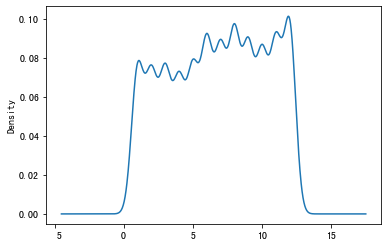

In [4]:
plt.figure()
data["月"].plot.density()

### 月份


In [362]:
da_mon=data.groupby(by="月").size()
da_mon=pd.DataFrame(da_mon)
da_mon.rename(columns={0:"count"},inplace=True)
da_mon.reset_index(inplace=True)
da_mon

月  count
0    1   2483
1    2   2262
2    3   2321
3    4   2160
4    5   2348
5    6   2800
6    7   2641
7    8   2946
8    9   2699
9   10   2575
10  11   2766
11  12   3217

([<matplotlib.axis.XTick at 0x27da19eb348>,
 <a list of 12 Text xticklabel objects>)

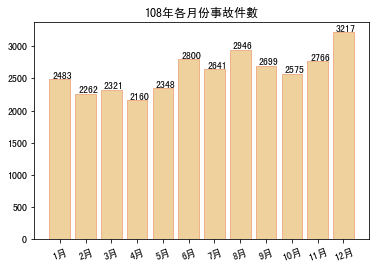

In [363]:
##事故發生月份
plt.bar(da_mon["月"],da_mon["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年各月份事故件數")
for x, y in zip(da_mon["月"],da_mon["count"]):
    plt.text(x + 0.1, y + 1.5, y, ha='center', va='bottom')
x_label=["1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"]
plt.xticks(da_mon["月"],x_label ,rotation=20)

### 星期


In [364]:
da_we=data.groupby(by="星期").size()
da_we=pd.DataFrame(da_we)
da_we.rename(columns={0:"count"},inplace=True)
da_we.reset_index(inplace=True)
da_we


星期  count
0   0   4025
1   1   4093
2   2   4307
3   3   4251
4   4   5568
5   5   4649
6   6   4325

([<matplotlib.axis.XTick at 0x27da1165bc8>,
 <a list of 7 Text xticklabel objects>)

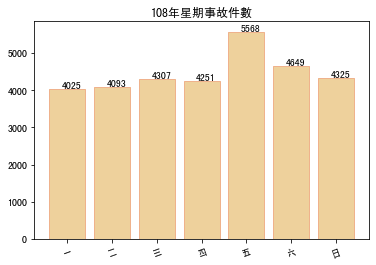

In [365]:
##事故發生星期
plt.bar(da_we["星期"],da_we["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年星期事故件數")
for x, y in zip(da_we["星期"],da_we["count"]):
    plt.text(x + 0.1, y + 1.5, y, ha='center', va='bottom')
x_label=["一","二","三","四","五","六","日"]
plt.xticks(da_we["星期"],x_label ,rotation=20)

### 交通事故類別


In [366]:
da_ty=data.groupby(by="交通事故類別").size()
da_ty=pd.DataFrame(da_ty)
da_ty.rename(columns={0:"count"},inplace=True)
da_ty.reset_index(inplace=True)
da_ty

交通事故類別  count
0     A1     72
1     A2   2076
2     A3  29070

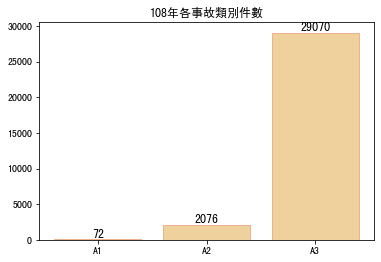

In [367]:
## 事故類別

plt.bar(da_ty["交通事故類別"],da_ty["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年各事故類別件數")
for x, y in zip(da_ty["交通事故類別"],da_ty["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)

###  縣市

In [368]:
da_ci=data.groupby(by="縣市").size()
da_ci=pd.DataFrame(da_ci)
da_ci.rename(columns={0:"count"},inplace=True)
da_ci.reset_index(inplace=True)
da_ci

縣市  count
0   南投縣    606
1   嘉義市     43
2   嘉義縣    380
3   基隆市    241
4   宜蘭縣     67
5   屏東縣    256
6   彰化縣   2022
7   新北市   5427
8   新竹市    631
9   新竹縣   2378
10  桃園市   4936
11  臺中市   3464
12  臺北市   1977
13  臺南市   2779
14  苗栗縣   1306
15  雲林縣    751
16  高雄市   3954

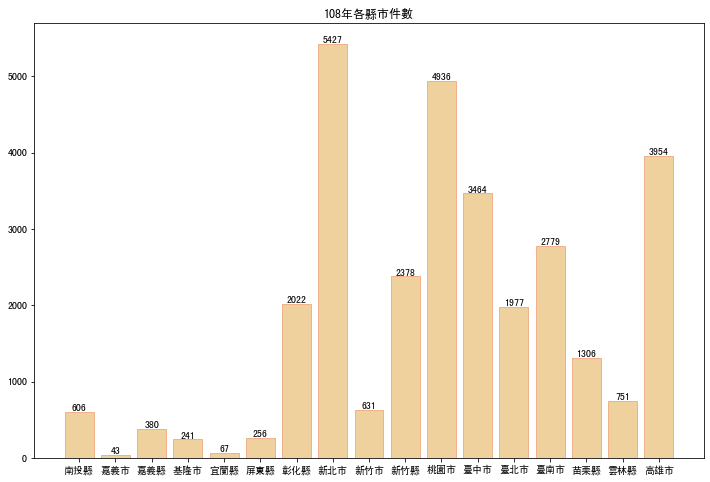

In [369]:
## 事故發生縣市
plt.figure(figsize=(12,8))
plt.bar(da_ci["縣市"],da_ci["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年各縣市件數")
for x, y in zip(da_ci["縣市"],da_ci["count"]):
    plt.text(x, y +0.25, '%.0f' % y, ha='center', va='bottom')

### 公路名稱

In [370]:
da_ro=data.groupby(by="公路名稱").size()
da_ro=pd.DataFrame(da_ro)
da_ro.rename(columns={0:"count"},inplace=True)
da_ro.reset_index(inplace=True)
da_ro

公路名稱  count
0  南港聯絡道      8
1  國道10號    722
2   國道1號  20986
3   國道2號    915
4   國道3甲     81
5   國道3號   7645
6   國道4號    166
7   國道5號    148
8   國道6號    347
9   國道8號    200

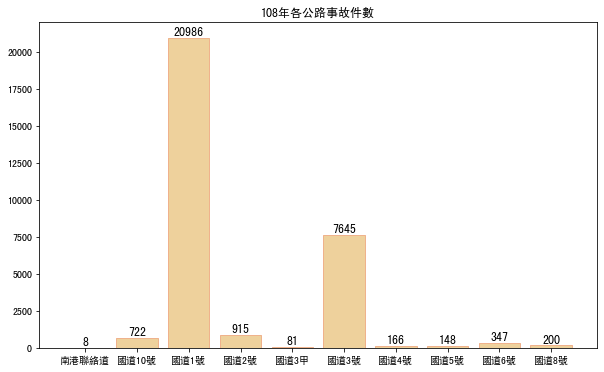

In [371]:
## 事故發生公路
plt.figure(figsize=(10,6))
plt.bar(da_ro["公路名稱"],da_ro["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年各公路事故件數")
for x, y in zip(da_ro["公路名稱"],da_ro["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)

### 事故位置

主要

In [372]:
da_lo=data.groupby(by="事故位置(主)").size()
da_lo=pd.DataFrame(da_lo)
da_lo.rename(columns={0:"count"},inplace=True)
da_lo.reset_index(inplace=True)
da_lo

事故位置(主)  count
0        1     72
1        2  23551
2        3   5767
3        4   1828

([<matplotlib.axis.XTick at 0x27d9d2bfb88>,
 <a list of 4 Text xticklabel objects>)

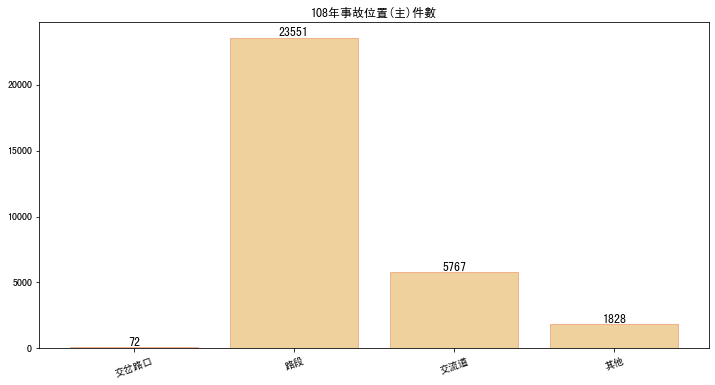

In [373]:
plt.figure(figsize=(12,6))
xx=['%d' %i for i in da_lo["事故位置(主)"]]
plt.bar(xx,da_lo["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年事故位置(主)件數")
for x, y in zip(xx,da_lo["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["交岔路口","路段","交流道","其他"]
plt.xticks(xx,x_label ,rotation=20)

子類別

In [374]:
da_lo=data.groupby(by="事故位置(子)").size()
da_lo=pd.DataFrame(da_lo)
da_lo.rename(columns={0:"count"},inplace=True)
da_lo.reset_index(inplace=True)
da_lo

事故位置(子)  count
0         1     32
1         2     40
2         5     16
3         6     22
4         7  22377
5         8     24
6         9    622
7        13    490
8        14    241
9        15    900
10       16   4233
11       17    393
12       18      1
13       21      1
14       22   1826

([<matplotlib.axis.XTick at 0x27d9cced588>,
 <a list of 15 Text xticklabel objects>)

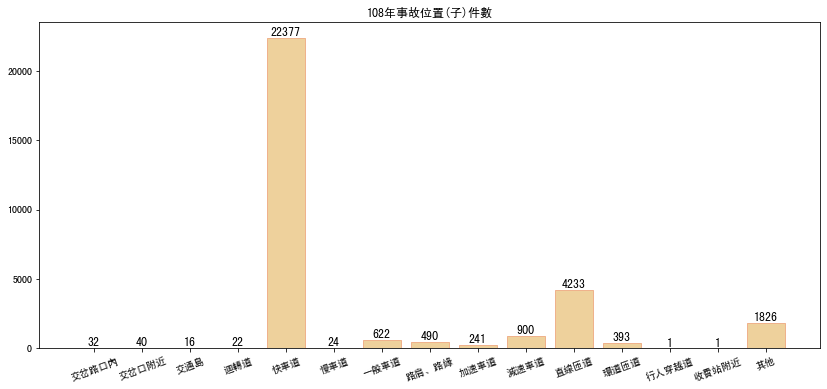

In [375]:
plt.figure(figsize=(14,6))
xx=['%d' %i for i in da_lo["事故位置(子)"]]
plt.bar(xx,da_lo["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年事故位置(子)件數")
for x, y in zip(xx,da_lo["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["交岔路口內","交岔口附近","交通島","迴轉道","快車道","慢車道","一般車道","路肩、路緣","加速車道","減速車道","直線匝道",
"環道匝道","行人穿越道","收費站附近","其他"]
plt.xticks(xx,x_label ,rotation=20)


In [78]:
data.groupby(by=["事故位置(子)"])["受傷人數"].sum()/data.groupby(by=["事故位置(子)"]).size()

事故位置(子)
1     0.125000
2     0.150000
5     0.187500
6     0.136364
7     0.123475
8     0.125000
9     0.131833
13    0.206122
14    0.128631
15    0.105556
16    0.068982
17    0.142494
18    2.000000
21    0.000000
22    0.016429
dtype: float64

In [73]:
data.groupby(by=["事故位置(子)","交通事故類別"]).size()#/data.groupby(by=["事故位置(子)"]).size()

事故位置(子)  交通事故類別
1        A2            4
         A3           28
2        A2            4
         A3           36
5        A2            3
         A3           13
6        A2            1
         A3           21
7        A1           56
         A2         1606
         A3        20715
8        A2            2
         A3           22
9        A1            4
         A2           43
         A3          575
13       A1            5
         A2           73
         A3          412
14       A1            2
         A2           19
         A3          220
15       A2           57
         A3          843
16       A1            3
         A2          197
         A3         4033
17       A1            2
         A2           43
         A3          348
18       A2            1
21       A3            1
22       A2           23
         A3         1803
dtype: int64

### 事故類型及型態

主要

In [376]:
da_ca=data.groupby(by="事故類型及型態(主)").size()
da_ca=pd.DataFrame(da_ca)
da_ca.rename(columns={0:"count"},inplace=True)
da_ca.reset_index(inplace=True)
da_ca

事故類型及型態(主)  count
0           1     34
1           2  28362
2           3   2822

([<matplotlib.axis.XTick at 0x27d9d2b6588>,
 <a list of 3 Text xticklabel objects>)

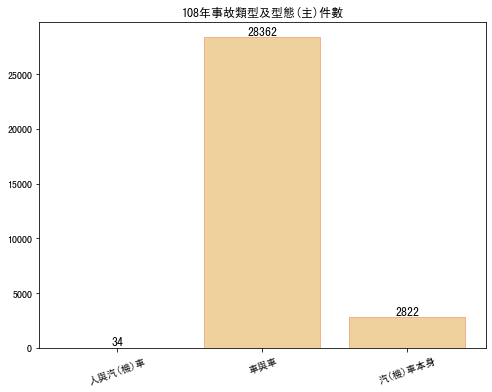

In [377]:
plt.figure(figsize=(8,6))
xx=['%d' %i for i in da_ca["事故類型及型態(主)"]]
plt.bar(xx,da_ca["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年事故類型及型態(主)件數")
for x, y in zip(xx,da_ca["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["人與汽(機)車","車與車","汽(機)車本身"]
plt.xticks(xx,x_label ,rotation=20)

子類別


In [378]:
da_ca=data.groupby(by="事故類型及型態(子)").size()
da_ca=pd.DataFrame(da_ca)
da_ca.rename(columns={0:"count"},inplace=True)
da_ca.reset_index(inplace=True)
da_ca

事故類型及型態(子)  count
0            2      2
1            3      5
2            5      3
3            6      2
4            8      1
5            9     21
6           10     23
7           11     48
8           12   4802
9           13  19774
10          14   1098
11          15     13
12          16    217
13          17   2387
14          18     69
15          19     38
16          20   1583
17          21     24
18          22      1
19          23     30
20          24     38
21          25      5
22          26     15
23          27     48
24          28     14
25          29    957

([<matplotlib.axis.XTick at 0x27da1fb4608>,
 <a list of 26 Text xticklabel objects>)

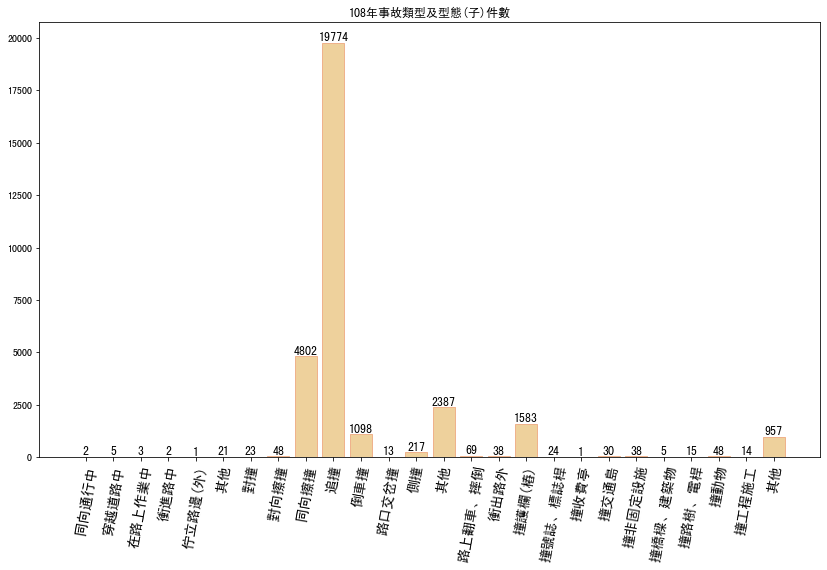

In [380]:
plt.figure(figsize=(14,8))
xx=['%d' %i for i in da_ca["事故類型及型態(子)"]]
plt.bar(xx,da_ca["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年事故類型及型態(子)件數")
for x, y in zip(xx,da_ca["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["同向通行中","穿越道路中","在路上作業中","衝進路中","佇立路邊(外)","其他","對撞","對向擦撞","同向擦撞","追撞","倒車撞",
"路口交岔撞","側撞","其他","路上翻車、摔倒","衝出路外","撞護欄(樁)","撞號誌、標誌桿","撞收費亭","撞交通島","撞非固定設施",
"撞橋樑、建築物","撞路樹、電桿","撞動物","撞工程施工","其他"]
plt.xticks(xx,x_label ,rotation=80,fontsize=14)

### 當事者車種

In [381]:
da_c=data.groupby(by="當事者車種(主)").size()
da_c=pd.DataFrame(da_c)
da_c.rename(columns={0:"count"},inplace=True)
da_c.reset_index(inplace=True)
da_c

當事者車種(主)  count
0          0   1532
1          1    392
2          2   1372
3          3    138
4          4   1269
5          5    284
6          6  20057
7          7   6089
8          8     25
9          9      7
10        10     21
11        11      1
12        12     11
13        13     20

([<matplotlib.axis.XTick at 0x27da20c2488>,
 <a list of 14 Text xticklabel objects>)

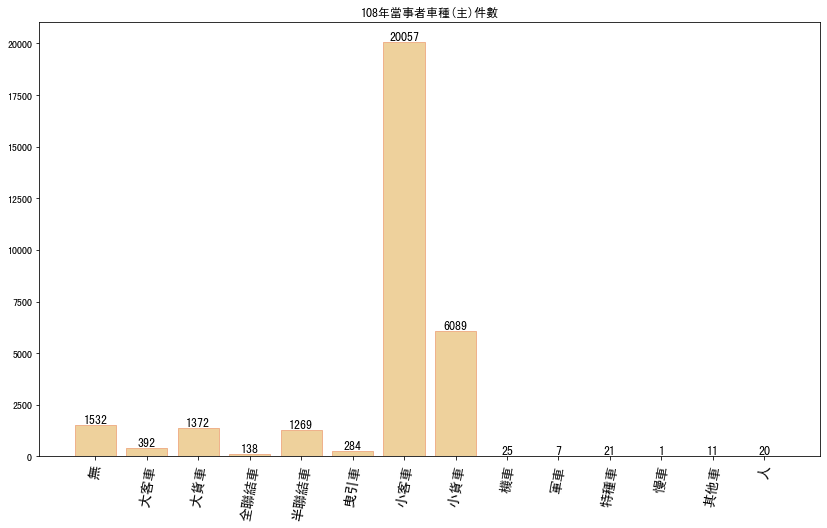

In [382]:
plt.figure(figsize=(14,8))
xx=['%d' %i for i in da_c["當事者車種(主)"]]
plt.bar(xx,da_c["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年當事者車種(主)件數")
for x, y in zip(xx,da_c["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["無","大客車","大貨車","全聯結車","半聯結車","曳引車","小客車","小貨車","機車","軍車","特種車","慢車","其他車","人"]
plt.xticks(xx,x_label ,rotation=80,fontsize=14)

### 肇因研判

主要

In [383]:
da_re=data.groupby(by="肇因研判(主)").size()
da_re=pd.DataFrame(da_re)
da_re.rename(columns={0:"count"},inplace=True)
da_re.reset_index(inplace=True)
da_re

肇因研判(主)  count
0        1  25216
1        2      1
2        3    463
3        4   4467
4        5     68
5        6    525
6        7     17
7        8     19
8        9    442

([<matplotlib.axis.XTick at 0x27d9d7af5c8>,
 <a list of 9 Text xticklabel objects>)

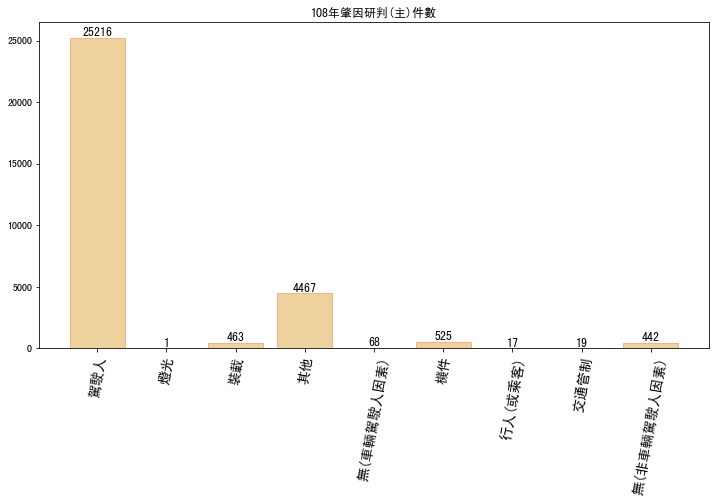

In [384]:
plt.figure(figsize=(12,6))
xx=['%d' %i for i in da_re["肇因研判(主)"]]
plt.bar(xx,da_re["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年肇因研判(主)件數")
for x, y in zip(xx,da_re["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["駕駛人","燈光","裝載","其他","無(車輛駕駛人因素)","機件","行人(或乘客)","交通管制","無(非車輛駕駛人因素)"]
plt.xticks(xx,x_label ,rotation=80,fontsize=14)

子類別

In [385]:
da_re=data.groupby(by="肇因研判(子)").size()
da_re=pd.DataFrame(da_re)
da_re.rename(columns={0:"count"},inplace=True)
da_re.reset_index(inplace=True)
da_re


肇因研判(子)  count
0         1     59
1         2     55
2         4     11
3         6     91
4         7   3772
5         8     58
6         9     23
7        10      3
8        12   1038
9        13     25
10       14    101
11       16  13278
12       17    248
13       18    160
14       19     47
15       20      1
16       21    110
17       22     79
18       23   6013
19       25      3
20       26     41
21       27      1
22       30    326
23       31      7
24       32      1
25       33      1
26       35     52
27       37     76
28       38     15
29       39     32
30       40    197
31       41      9
32       42   2902
33       43   1312
34       44     68
35       45      4
36       47      2
37       48    326
38       49    167
39       50     26
40       54      1
41       60     16
42       61      3
43       62      3
44       65     13
45       66     30
46       67    412

([<matplotlib.axis.XTick at 0x27da295e748>,
 <a list of 47 Text xticklabel objects>)

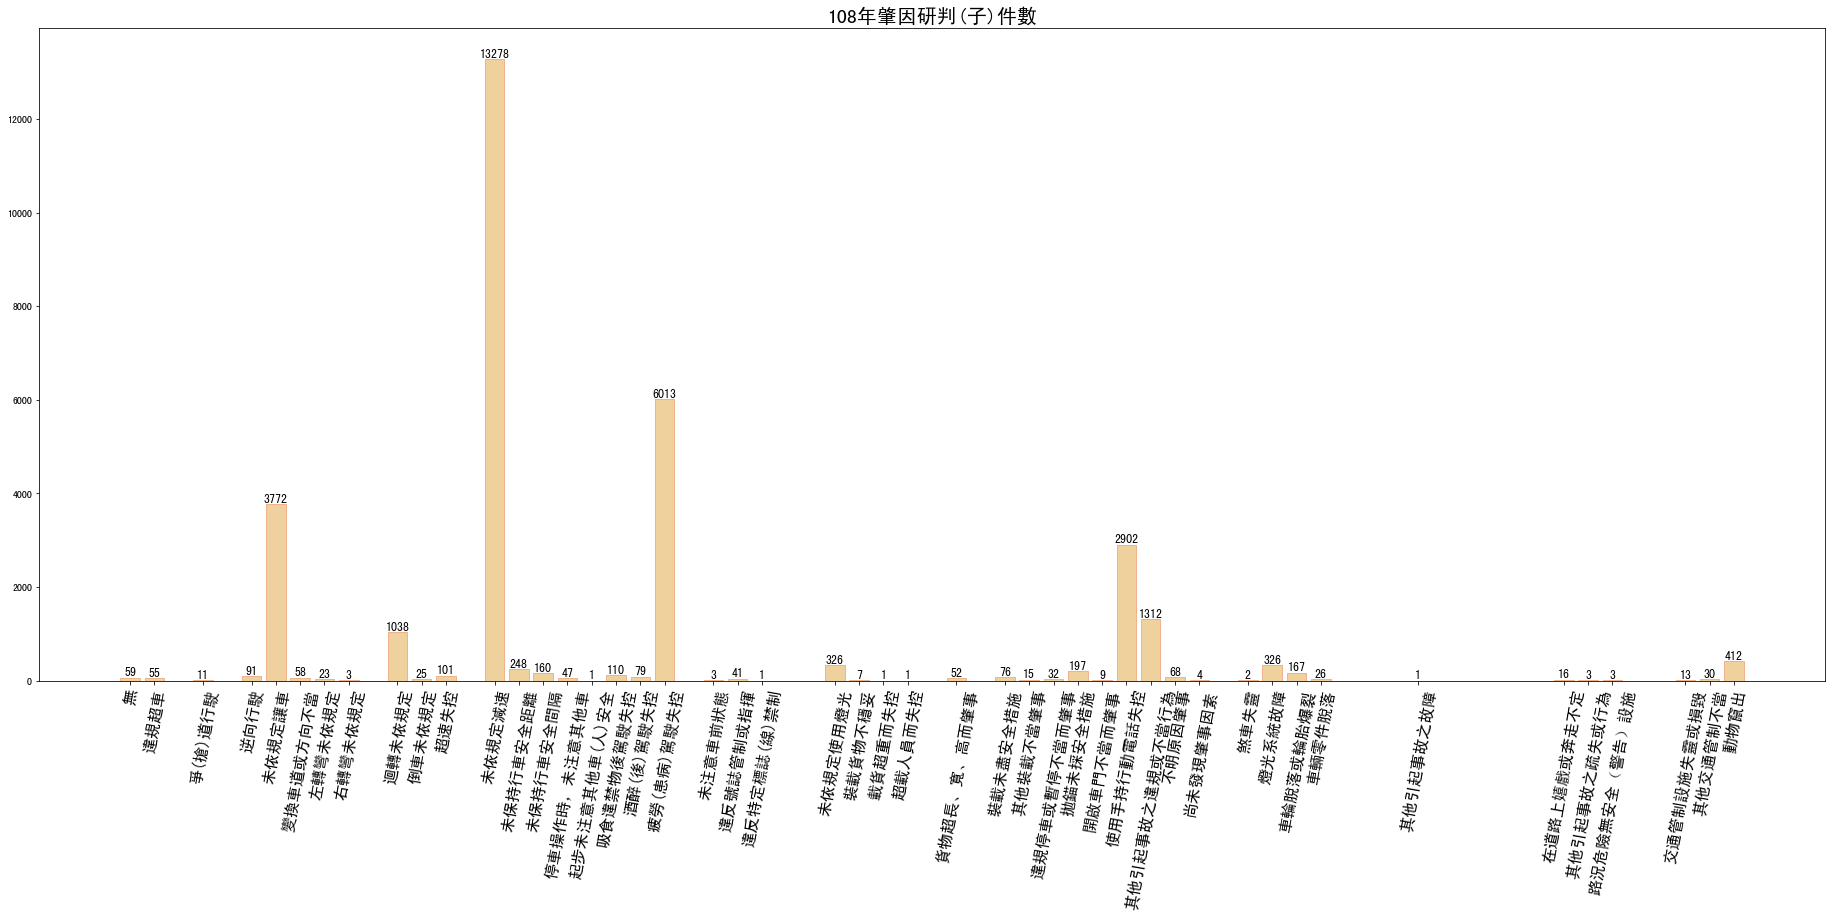

In [386]:
plt.figure(figsize=(32,12))
plt.bar(da_re["肇因研判(子)"],da_re["count"],edgecolor="#EFB28C",color="#EED19C")
plt.title("108年肇因研判(子)件數",fontsize=20)
for x, y in zip(da_re["肇因研判(子)"],da_re["count"]):
    plt.text(x , y +0.05, '%.0f' % y, ha='center', va='bottom',fontsize=12)
x_label=["無","違規超車","爭(搶)道行駛","逆向行駛","未依規定讓車","變換車道或方向不當","左轉彎未依規定","右轉彎未依規定","迴轉未依規定",
"倒車未依規定","超速失控","未依規定減速","未保持行車安全距離","未保持行車安全間隔","停車操作時，未注意其他車","起步未注意其他車(人)安全",
"吸食違禁物後駕駛失控","酒醉(後)駕駛失控","疲勞(患病)駕駛失控","未注意車前狀態","違反號誌管制或指揮","違反特定標誌(線)禁制","未依規定使用燈光",
"裝載貨物不穩妥","載貨超重而失控","超載人員而失控","貨物超長、寬、高而肇事","裝載未盡安全措施","其他裝載不當肇事","違規停車或暫停不當而肇事",
"拋錨未採安全措施","開啟車門不當而肇事","使用手持行動電話失控","其他引起事故之違規或不當行為","不明原因肇事","尚未發現肇事因素","煞車失靈",
"燈光系統故障","車輪脫落或輪胎爆裂","車輛零件脫落","其他引起事故之故障","在道路上嬉戲或奔走不定","其他引起事故之疏失或行為","路況危險無安全（警告）設施",
"交通管制設施失靈或損毀","其他交通管制不當","動物竄出","尚未發現肇事因素"]
plt.xticks(da_re["肇因研判(子)"],x_label ,rotation=80,fontsize=16)

### dataset: 
total10_split01.csv / deal_time.csv

In [7]:
import calendar

In [8]:
df=pd.read_csv("C:/Users/user/Desktop/ETC/accident/deal_time.csv",index_col=0)
df

內容 通報地區  通報級數  \
0      北控通報3級01/01,00:02國1南向19.5K(結報)外2線2小車追撞事故,00:39...   北控     3   
1      北控通報3級01/01,00:55國1北向43.5K(結報)中線1小車撞護欄事故,01:31...   北控     3   
2      北控通報3級01/01,01:58國1南向60K(結報)1小客車火燒車事故,03:08排除,...   北控     3   
3      北控通報3級01/01,07:05國3北向安坑入口(結報)2小車追撞事故,無傷亡,無回堵,0...   北控     3   
4      北控通報3級01/01,08:45國1南向圓山出口(結報)1小客自撞事故,無傷亡,無回堵,0...   北控     3   
...                                                  ...  ...   ...   
19568  南控通報3級12/31,18:46國1南向351K(結報)小客車+貨櫃車追撞,18:49排除...   南控     3   
19569  南控通報3級12/31,18:59國1南向337.7K(結報)2小客車追撞,19:13排除,...   南控     3   
19570  南控通報3級12/31,19:05國1南向316.8K(結報)3小客車追撞,19:17排除,...   南控     3   
19571  南控通報3級12/31,19:36國1南向335.3K(結報)4小客車追撞,19:49排除,...   南控     3   
19572  南控通報3級12/31,19:48國1南向334.8K(結報)3小客車追撞,20:05排除,...   南控     3   

             事故日期                 事故時間  國道 方向     公里數          事故  \
0      2019-01-01  1900-01-01 00:02:00  國1  南   19.5K  外2線2小車追撞事故   
1      2019-01-01  1900-01-01 00:55:00  國1  北   43.5K  中線1小車撞護欄事故   
2      2019-01-01  1900-01-01 01:58:00  國1  南     60K   1小客車火燒車事故   
3      2019-01-01  1900-01-01 07:05:00  國3  北    安坑入口     2小車追撞事故   
4      2019-01-01  1900-01-01 08:45:00  國1  南    圓山出口     1小客自撞事故   
...           ...                  ...  .. ..     ...         ...   
19568  2019-12-31  1900-01-01 18:46:00  國1  南    351K   小客車+貨櫃車追撞   
19569  2019-12-31  1900-01-01 18:59:00  國1  南  337.7K      2小客車追撞   
19570  2019-12-31  1900-01-01 19:05:00  國1  南  316.8K      3小客車追撞   
19571  2019-12-31  1900-01-01 19:36:00  國1  南  335.3K      4小客車追撞   
19572  2019-12-31  1900-01-01 19:48:00  國1  南  334.8K      3小客車追撞   

                      排除時間 通報來源  回堵情況                       處理時間  星期  
0      1900-01-01 00:39:00  國1隊     無  0 days 00:37:00.000000000   1  
1      1900-01-01 01:31:00   1隊     無  0 days 00:36:00.000000000   1  
2      1900-01-01 03:08:00  國1隊     無  0 days 01:10:00.000000000   1  
3      1900-01-01 07:29:00   9隊     無  0 days 00:24:00.000000000   1  
4      1900-01-01 09:05:00   1隊     無  0 days 00:20:00.000000000   1  
...                    ...  ...   ...                        ...  ..  
19568  1900-01-01 18:49:00   5隊  約3K,  0 days 00:03:00.000000000   1  
19569  1900-01-01 19:13:00   4隊  約2K,  0 days 00:14:00.000000000   1  
19570  1900-01-01 19:17:00   4隊  約1K,  0 days 00:12:00.000000000   1  
19571  1900-01-01 19:49:00   4隊  約1K,  0 days 00:13:00.000000000   1  
19572  1900-01-01 20:05:00   4隊  約2K,  0 days 00:17:00.000000000   1  

[19573 rows x 14 columns]

In [9]:
#df=pd.read_csv("C:/Users/user/Desktop/ETC/accident/deal_time.csv",index_col=0)
df["事故日期"]=[datetime.strptime(i,"%Y-%m-%d")for i in df["事故日期"]]
df["事故時間"]=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S")for i in df["事故時間"]]
df["排除時間"]=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S")for i in df["排除時間"]]
df["處理時間"]=df["排除時間"]-df["事故時間"]
df["星期"]=[calendar.weekday(2019, i.month, i.day) for i in df["事故日期"]]
df["小時"]=[i.hour for i in df["事故時間"]]

In [10]:
df["通報來源"]=[str(i).replace('cctv',"CCTV") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace(' cctv',"CCTV") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace(' CCTV',"CCTV") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace(' 6隊',"6") for i in df["通報來源"]]

In [11]:
df_cctv=df[df["通報來源"]=="CCTV"]

In [12]:
df["通報來源"]=[i.split(" ")[0] for i in df["通報來源"]]

In [13]:
df["通報來源"].unique()

array(['國1隊', '1隊', '9隊', '6隊', '監控人員', 'CCTV', '2隊', '國2隊', '國6隊', '國9隊',
       '6', '9', '調度', 'nan', '無', '監控人', '國6', '', '1', '客服人員', '用路人',
       '1隊.', '：1隊', '事故班', '7', '2', '：2隊', '監', '6隊10:22', '2隊11:00',
       '6隊2:21', '6隊10:34', '2隊5:30', '1隊6:16', '1隊7:22', '1隊8:13',
       '1隊8:53', '1隊7:58', '1隊8:02', '1隊8:24', '1隊8:27', '2隊8:41', '國',
       '1隊\n', '國6隊.', '國1', '調', '監控', '１隊', '桃園縣119', '國1隊\n', '隊',
       '9隊路人', '國2', '施工人員', '6隊\\', '1隊`', 'CCTV`', '\n:1隊', '警廣', ',6隊',
       '國1隊.', '６隊', '事故小組+6隊', '6隊+事故小組', '國6隊\n', '2隊\n', '.1隊', '：9隊',
       '1隊隊', '：6隊', '6隊\n', '6隊.', '：國6隊', '：國2隊', '：國1隊', '9隊+調度', '坪控',
       'IID', '坪9隊', '3隊', '4隊', '7隊', '8隊', '7隊、大甲段', '2隊、苗栗段', '22隊',
       '3隊、斗南段', '5隊'], dtype=object)

In [14]:
df["通報來源"]=[i.split("隊")[0] for i in df["通報來源"]]

In [15]:
df["通報來源"]=[str(i).replace('國1',"1") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：1',"1") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('１',"1") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('\n:1',"1") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('.1',"1") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：國1',"1") for i in df["通報來源"]]

In [16]:
df["通報來源"]=[str(i).replace('國2',"2") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：2',"2") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：國2',"2") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('22',"2") for i in df["通報來源"]]

In [17]:
df["通報來源"]=[str(i).replace('國6',"6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace(',6',"6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('６',"6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('事故小組+6',"6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：6',"6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('：國6',"6") for i in df["通報來源"]]

In [18]:
df["通報來源"]=[str(i).replace('國9',"9") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace("：9","6") for i in df["通報來源"]]
df["通報來源"]=[str(i).replace('坪9',"6") for i in df["通報來源"]]



In [19]:
#num_list=["1","2","7","6","9"]
df_n1=df[df["通報來源"]=="1"]
df_n2=df[df["通報來源"]=="2"] 
df_n3=df[df["通報來源"]=="3"]
df_n4=df[df["通報來源"]=="4"] 
df_n5=df[df["通報來源"]=="5"]
df_n6=df[df["通報來源"]=="6"] 
df_n7=df[df["通報來源"]=="7"] 
df_n8=df[df["通報來源"]=="8"] 
df_n9=df[df["通報來源"]=="9"] 

df_source=pd.concat([df_n1,df_n2,df_n3,df_n4,df_n5,df_n6,df_n7,df_n8,df_n9])
df_source

內容 通報地區  通報級數  \
0      北控通報3級01/01,00:02國1南向19.5K(結報)外2線2小車追撞事故,00:39...   北控     3   
1      北控通報3級01/01,00:55國1北向43.5K(結報)中線1小車撞護欄事故,01:31...   北控     3   
2      北控通報3級01/01,01:58國1南向60K(結報)1小客車火燒車事故,03:08排除,...   北控     3   
4      北控通報3級01/01,08:45國1南向圓山出口(結報)1小客自撞事故,無傷亡,無回堵,0...   北控     3   
10     北控通報3級01/01,18:02國1高架北向30.5K(結報)2小自追撞佔用內線事故,無人...   北控     3   
...                                                  ...  ...   ...   
10908  坪控通報3級08/27  14:32   國5北向19.5K(結報)  2小客車追撞事故  ...   坪控     3   
10909  坪控通報3級08/27  17:00   國5北向31.3K(結報)  2小客車追撞事故  ...   坪控     3   
10910  坪控通報3級08/27  17:09   國5北向23.2K(結報)  2小客車追撞事故  ...   坪控     3   
10911  坪控通報3級08/28  10:28   國5南向35.3K(結報)  1小客車自撞事故  ...   坪控     3   
10912  坪控通報3級08/28  16:43   國5南向頭城出口匝道(結報)  1小客車自撞事故 ...   坪控     3   

            事故日期                事故時間  國道 方向     公里數  \
0     2019-01-01 1900-01-01 00:02:00  國1  南   19.5K   
1     2019-01-01 1900-01-01 00:55:00  國1  北   43.5K   
2     2019-01-01 1900-01-01 01:58:00  國1  南     60K   
4     2019-01-01 1900-01-01 08:45:00  國1  南    圓山出口   
10    2019-01-01 1900-01-01 18:02:00  國1  北   30.5K   
...          ...                 ...  .. ..     ...   
10908 2019-08-27 1900-01-01 14:32:00  國5  北   19.5K   
10909 2019-08-27 1900-01-01 17:00:00  國5  北   31.3K   
10910 2019-08-27 1900-01-01 17:09:00  國5  北   23.2K   
10911 2019-08-28 1900-01-01 10:28:00  國5  南   35.3K   
10912 2019-08-28 1900-01-01 16:43:00  國5  南  頭城出口匝道   

                                                   事故                排除時間  \
0                                          外2線2小車追撞事故 1900-01-01 00:39:00   
1                                          中線1小車撞護欄事故 1900-01-01 01:31:00   
2                                           1小客車火燒車事故 1900-01-01 03:08:00   
4                                             1小客自撞事故 1900-01-01 09:05:00   
10                                        2小自追撞佔用內線事故 1900-01-01 18:29:00   
...                                               ...                 ...   
10908    2小客車追撞事故  佔外側   於14:42排除    回堵1K       來源:9隊 1900-01-01 14:42:00   
10909    2小客車追撞事故  佔內側   於17:18排除    回堵2K       來源:9隊 1900-01-01 17:18:00   
10910    2小客車追撞事故  佔外側   於17:24排除    回堵2K       來源:9隊 1900-01-01 17:24:00   
10911    1小客車自撞事故  佔內側   於11:06排除    無回堵        來源:9隊 1900-01-01 11:06:00   
10912    1小客車自撞事故  佔外側   於17:03排除    無回堵        來源:9隊 1900-01-01 17:03:00   

      通報來源       回堵情況     處理時間  星期  小時  
0        1          無 00:37:00   1   0  
1        1          無 00:36:00   1   0  
2        1          無 01:10:00   1   1  
4        1          無 00:20:00   1   8  
10       1          無 00:27:00   1  18  
...    ...        ...      ...  ..  ..  
10908    9  1K        00:10:00   1  14  
10909    9  2K        00:18:00   1  17  
10910    9  2K        00:15:00   1  17  
10911    9          無 00:38:00   2  10  
10912    9          無 00:20:00   2  16  

[19127 rows x 15 columns]

In [20]:
df_source.to_csv("deal_time1-9.csv",encoding="utf_8_sig")

In [65]:
df_source.groupby(by=["通報來源","通報級數"]).size()

通報來源  通報級數
1     2        292
      3       5466
2     2         82
      3       1885
3     1          1
      2         75
      3       2559
4     1          1
      2         45
      3       1228
5     2         58
      3       2130
6     2         97
      3       2507
7     2         44
      3       1289
8     2         21
      3        459
9     2         30
      3        858
dtype: int64

In [64]:
df_sou=df_source.groupby(by=["通報來源","通報級數"])["處理時間"].sum()/df_source.groupby(by=["通報來源","通報級數"])["處理時間"].size()
df_sou

通報來源  通報級數
1     2      00:40:36.986301
      3      00:15:43.315038
2     2      01:09:09.512195
      3      00:17:56.275862
3     1             00:19:00
      2      00:37:27.200000
      3      00:23:05.205158
4     1             03:28:00
      2             01:21:36
      3      00:19:29.706840
5     2      01:33:06.206896
      3      00:21:44.873239
6     2      00:44:49.484536
      3      00:17:33.745512
7     2      00:52:12.272727
      3      00:23:12.847168
8     2      00:56:48.571428
      3      00:22:52.287581
9     2             00:47:58
      3      00:21:02.447552
Name: 處理時間, dtype: timedelta64[ns]

In [61]:
df_source["通報來源"]

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [290]:
#df.to_csv("deal_time.csv",encoding="utf_8_sig")

### 各國道 每時段(小時) 發生事故件數


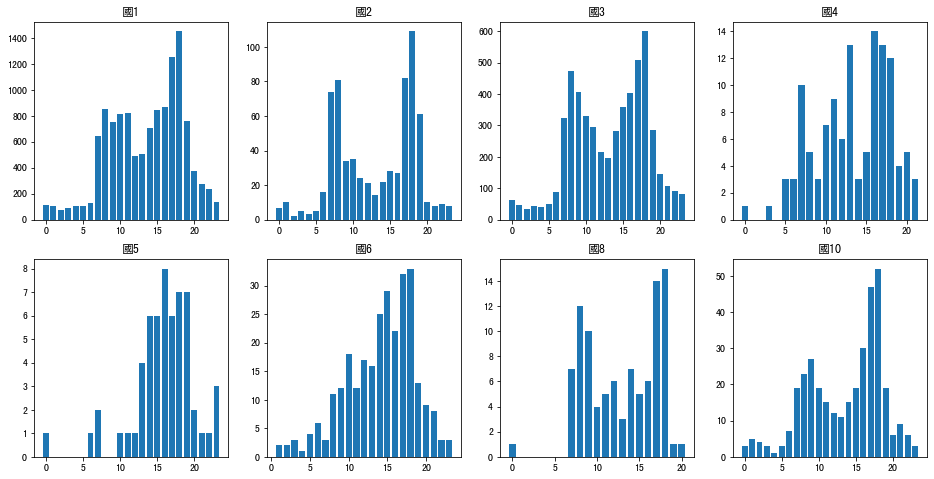

In [102]:
## 各國道 每時段(小時) 發生事故件數
#每小時發生事故件數

way=["國1","國2","國3","國4","國5","國6","國8","國10"]

def way_hour(way):
    
    dff=df[df["國道"]==way]
    dff=dff.groupby("小時").size()
    dff=pd.DataFrame(dff)
    dff.rename(columns={0:"count"},inplace=True)
    dff.reset_index(inplace=True)
    return dff
        
plt.figure(figsize=(16,8))
for w ,i in zip(way,range(1,9)):
    d=way_hour(w)
    plt.subplot(2,4,i)
    plt.bar(d["小時"],d["count"])
    plt.title(way[i-1])
plt.show()

### 各國道平均處理時間

In [291]:
## 各國道平均處理時間

df_ro=df.groupby("國道")["處理時間"].sum()/df.groupby("國道")["處理時間"].size()
df_ro=pd.DataFrame(df_ro)
df_ro.reset_index(inplace=True)
df_ro


國道            處理時間
0   南港聯絡道        00:18:40
1     台2己        00:58:00
2     台64        00:36:00
3      國1 00:19:17.770118
4     國10 00:30:22.122905
5      國2 00:16:11.309352
6      國3 00:22:02.808557
7      國4 00:25:40.500000
8      國5 00:35:55.862068
9      國6 00:24:46.690140
10     國8 00:23:15.463917
11  東山服務區        00:11:00
12  港西聯外道 01:24:42.857142

<BarContainer object of 13 artists>

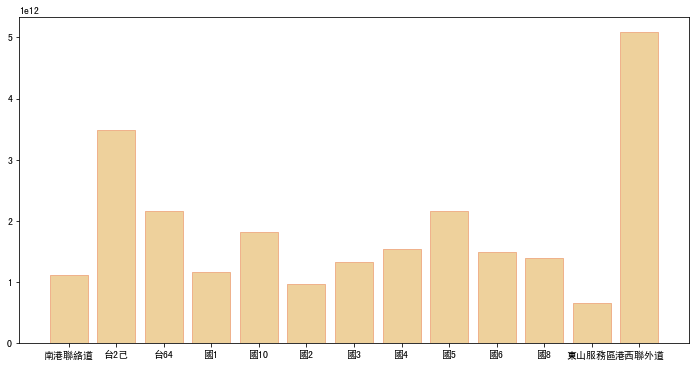

In [293]:
plt.figure(figsize=(12,6))
plt.bar(df_ro["國道"],df_ro["處理時間"],edgecolor="#EFB28C",color="#EED19C")

#### 各國道，不同通報級數平均處理時間 

In [294]:
## 各國道，各通報級數平均處理時間 
df_role=df.groupby(by=["國道","通報級數"])["處理時間"].sum()/df.groupby(by=["國道","通報級數"])["處理時間"].size()
df_role=pd.DataFrame(df_role)
df_role.reset_index(inplace=True)
df_role

國道  通報級數            處理時間
0   南港聯絡道     3        00:18:40
1     台2己     3        00:58:00
2     台64     2        00:36:00
3      國1     1        01:53:30
4      國1     2 00:47:25.069306
5      國1     3 00:18:05.634555
6     國10     2        01:27:16
7     國10     3 00:27:52.827988
8      國2     2 00:38:25.384615
9      國2     3 00:15:19.461883
10     國3     2 00:54:03.061224
11     國3     3 00:20:51.431822
12     國4     3 00:25:40.500000
13     國5     2        00:47:20
14     國5     3 00:35:18.545454
15     國6     2 00:42:35.294117
16     國6     3 00:23:38.651685
17     國8     2        00:43:30
18     國8     3 00:22:23.225806
19  東山服務區     3        00:11:00
20  港西聯外道     2        01:46:36
21  港西聯外道     3        00:30:00

#### 各國道,各星期平均處理時間

In [113]:
## 各國道,各星期平均處理時間

df_romo=df.groupby(by=["國道","星期"])["處理時間"].sum()/df.groupby(by=["國道","星期"])["處理時間"].size()
df_romo=pd.DataFrame(df_romo)
df_romo.reset_index(inplace=True)
df_romo



國道  星期     處理時間
0   南港聯絡道   0 00:22:00
1   南港聯絡道   2 00:20:00
2   南港聯絡道   4 00:23:00
3   南港聯絡道   5 00:04:00
4     台2己   3 00:58:00
..    ...  ..      ...
62  東山服務區   3 00:11:00
63  港西聯外道   0 01:12:00
64  港西聯外道   1 01:58:00
65  港西聯外道   4 00:44:00
66  港西聯外道   5 01:47:30

[67 rows x 3 columns]

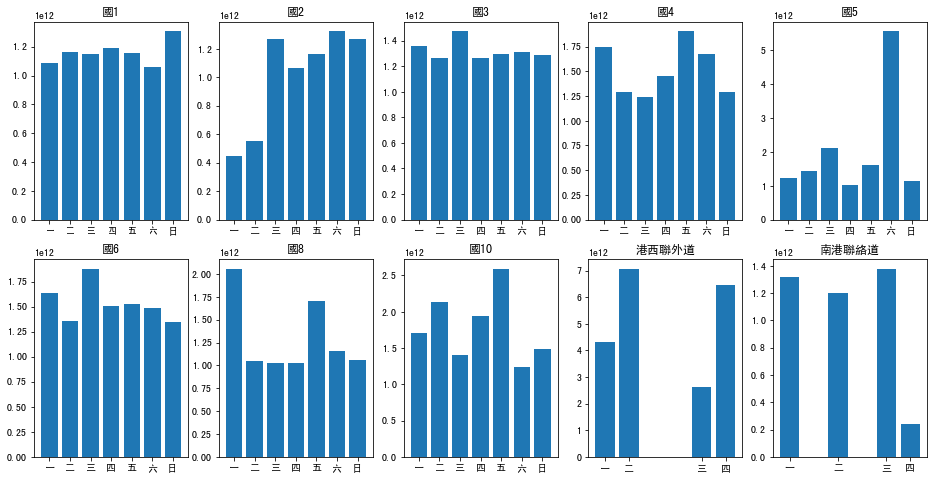

In [109]:
#各國道 星期一至星期五barplot

way=["國1","國2","國3","國4","國5","國6","國8","國10","港西聯外道","南港聯絡道"]

def ro_mo(way):
    df_rom=df_romo[df_romo["國道"]==way]
    return df_rom

plt.figure(figsize=(16,8))
x_label=["一","二","三","四","五","六","日"]
for w ,i in zip(way,range(1,11)):
    d=ro_mo(w) 
    plt.subplot(2,5,i)
    plt.bar(d["星期"],d["處理時間"])
    plt.title(way[i-1])
    plt.xticks(d["星期"],x_label)
plt.show()

### 不同國道 各星期 各時段 事故件數


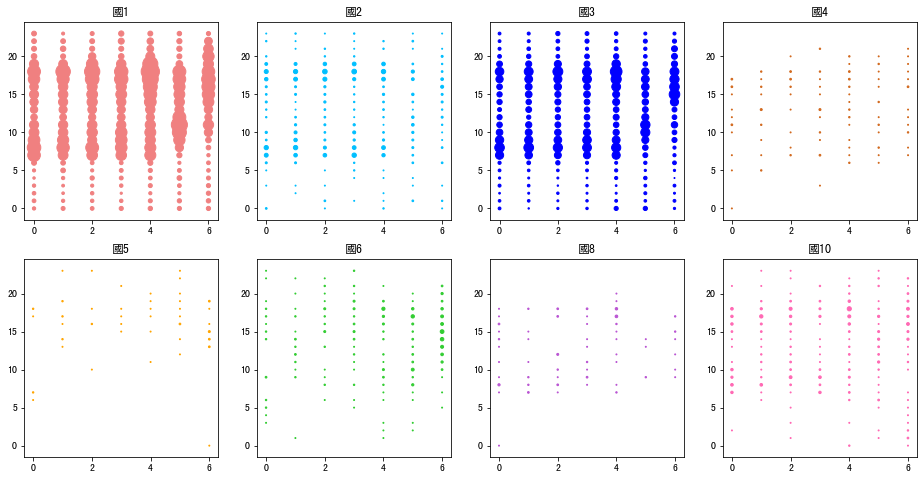

In [138]:

way=["國1","國2","國3","國4","國5","國6","國8","國10"]

def we_hou(way):
    d=df[df["國道"]==way]
    d=d.groupby(by=["星期","小時"]).size()
    d=pd.DataFrame(d)
    d.rename(columns={0:"count"},inplace=True)
    d.reset_index(inplace=True)
    return d

fig=plt.figure(figsize=(16,8))
x_label=["一","二","三","四","五","六","日"]
color=["lightcoral","deepskyblue","blue","chocolate","orange","limegreen","mediumorchid","hotpink"]

for w,i in zip(way,range(1,9)): 
    ax = fig.add_subplot(2,4,i,sharey=ax)
    dd=we_hou(w)
    ax.scatter(dd['星期'],dd['小時'],s=dd['count'],c=color[i-1])
    plt.title(way[i-1])
    #plt.xticks(dd["星期"],x_label)
    
plt.show()

In [201]:
data=pd.read_csv("D:/M05A/accident_all_new.csv",index_col=0)

In [4]:
data.columns

Index(['內容', '通報地區', '通報級數', '事故日期', '月', '日', '星期', '事件時間', '小時', '公路名稱',
       '向車道', '路線公里', '路線公尺', '事故', '排除時間', '通報來源', '回堵情況', '處理時間', '縣市',
       '市區鄉鎮', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數', '天候代碼', '光線代碼', '道路類別', '速限',
       '道路型態(主)', '道路型態(子)', '事故位置(主)', '事故位置(子)', '路面狀況-鋪裝', '路面狀況-狀態',
       '路面狀況-缺陷', '道路障礙-障礙物', '道路障礙-視距', '號誌-號誌種類', '號誌-號誌動作',
       '車道劃分設施-分向設施(主)', '車道劃分設施-分向設施(子)', '車道劃分設施-分道設施-快車道或一般車道間',
       '車道劃分設施-分道設施-快慢車道間', '車道劃分設施-分道設施-路面邊線', '事故類型及型態(主)', '事故類型及型態(子)',
       '當事者車種(主)', '當事者車種(子)', '肇因研判(主)', '肇因研判(子)', '里程數', '道路+方向', '是否為連續假日',
       '是否為假日', '是否開放路肩', '時+日', '總通行量', '總平均車速', '小客車數', '小貨車數', '大貨車數',
       '聯結車數', '貨櫃車數', '槽車數', '拖板車數', '垃圾車數', '砂石車數', '機車數', '警車數', '大客車數',
       '曳引車數', '救護車數', '事故涉及車輛數'],
      dtype='object')

In [202]:
data["回堵情況"]=[str(i).replace("無","0") for i in data['回堵情況']]
data["回堵情況"]=data["回堵情況"].astype("float")

(0, 200)

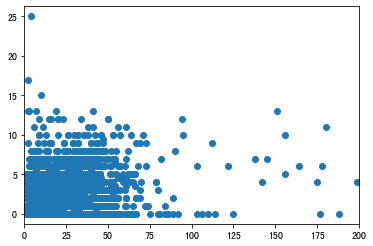

In [6]:
plt.scatter(x=data["處理時間"],y=data["回堵情況"])
plt.xlim(0,200)


(0, 400)

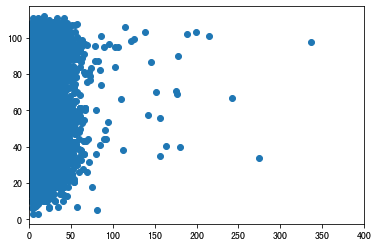

In [7]:
plt.scatter(x=data["處理時間"],y=data["總平均車速"])
plt.xlim(0,400)


In [ ]:
df=data[data["公路名稱"]]

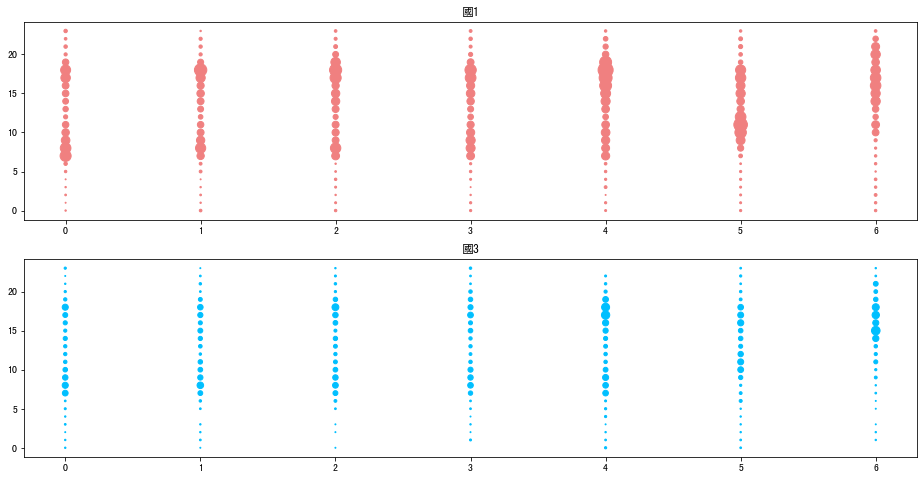

In [46]:
way=["國1","國3"]

def we_hou(way):
    d=data[data["公路名稱"]==way]
    d=d.groupby(by=["星期","小時"]).size()
    d=pd.DataFrame(d)
    d.rename(columns={0:"count"},inplace=True)
    d.reset_index(inplace=True)
    return d

fig=plt.figure(figsize=(16,8))
x_label=["一","三","四","五","六","日"]
color=["lightcoral","deepskyblue"]
for w,i in zip(way,range(1,9)): 
    ax = fig.add_subplot(2,1,i)
    dd=we_hou(w)
    ax.scatter(dd['星期'],dd['小時'],s=dd['count'],c=color[i-1])
    plt.title(way[i-1])
#plt.xticks(dd["星期"],x_label)
    
plt.show()

# EDA

In [203]:
data["當事者車種(主)"].unique() # 2 4 1 3 5 12 9 #6 7 10 8
b_list=[2,4,1,3,5,12,9]
s_list=[6,7,10]

In [204]:
ca_list=[]
for i in data["當事者車種(主)"]:
    if i in b_list:
        ca="b"
    else :
        ca="s"
    ca_list.append(ca)
data["大小車"]=ca_list


In [205]:
data["向車道"]

0       北
1       南
2       北
3       北
4       北
       ..
7286    北
7287    南
7288    南
7289    南
7290    北
Name: 向車道, Length: 7291, dtype: object

In [206]:
data1=data[(data["公路名稱"]=='國1')]
data1s=data1[data1["大小車"]=="s"]
data1b=data1[data1["大小車"]=="b"]

data1ss=data1s[data1s["向車道"]=="南"]
data1sn=data1s[data1s["向車道"]=="北"]

data1bs=data1b[data1b["向車道"]=="南"]
data1bn=data1b[data1b["向車道"]=="北"]

In [82]:
df_ow1ss=data1ss.groupby(by=["是否開放路肩","是否為假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1ss=pd.DataFrame(df_ow1ss)
df_ow1ss.reset_index(inplace=True)
df_ow1ss=df_ow1ss.pivot("是否開放路肩","是否為假日","處理時間")
df_ow1ss

df_ow1sn=data1sn.groupby(by=["是否開放路肩","是否為假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1sn=pd.DataFrame(df_ow1sn)
df_ow1sn.reset_index(inplace=True)
df_ow1sn=df_ow1sn.pivot("是否開放路肩","是否為假日","處理時間")
df_ow1sn


df_ow1bs=data1bs.groupby(by=["是否開放路肩","是否為假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1bs=pd.DataFrame(df_ow1bs)
df_ow1bs.reset_index(inplace=True)
df_ow1bs=df_ow1bs.pivot("是否開放路肩","是否為假日","處理時間")
df_ow1bs

df_ow1bn=data1bn.groupby(by=["是否開放路肩","是否為假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1bn=pd.DataFrame(df_ow1bn)
df_ow1bn.reset_index(inplace=True)
df_ow1bn=df_ow1bn.pivot("是否開放路肩","是否為假日","處理時間")
df_ow1bn


是否為假日      0          1
是否開放路肩                 
0       26.0  35.365385

In [692]:
data1b=data1b.reset_index(drop=True)
gen_list=[]
for i in range(len(data1b)):
    if data1b["是否為假日"][i]==1 & data1b["是否為連續假日"][i]==0:
        gen=1
    else:
        gen=0
    gen_list.append(gen)
data1b["是否為一般假日"]=gen_list

In [693]:
df_ow1s=data1s.groupby(by=["是否開放路肩","是否為一般假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1s=pd.DataFrame(df_ow1s)
df_ow1s.reset_index(inplace=True)
df_ow1s=df_ow1s.pivot("是否開放路肩","是否為一般假日","處理時間")
df_ow1s

df_ow1sc=data1s.groupby(by=["是否開放路肩","是否為連續假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1sc=pd.DataFrame(df_ow1sc)
df_ow1sc.reset_index(inplace=True)
df_ow1sc=df_ow1sc.pivot("是否開放路肩","是否為連續假日","處理時間")
df_ow1sc

df_ow1b=data1b.groupby(by=["是否開放路肩","是否為一般假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1b=pd.DataFrame(df_ow1b)
df_ow1b.reset_index(inplace=True)
df_ow1b=df_ow1b.pivot("是否開放路肩","是否為一般假日","處理時間")
df_ow1b

df_ow1bc=data1b.groupby(by=["是否開放路肩","是否為連續假日"])["處理時間"].mean()  #假日且開放df路肩 最長
df_ow1bc=pd.DataFrame(df_ow1bc)
df_ow1bc.reset_index(inplace=True)
df_ow1bc=df_ow1bc.pivot("是否開放路肩","是否為連續假日","處理時間")
df_ow1bc

是否為連續假日          0          1
是否開放路肩                       
0        24.165085  27.176471
1        18.357143        NaN

In [569]:
parameters = {'axes.labelsize': 16
          ,'xtick.labelsize':16,'ytick.labelsize':16}
plt.rcParams.update(parameters)

In [694]:
sns.set_style("white")
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')

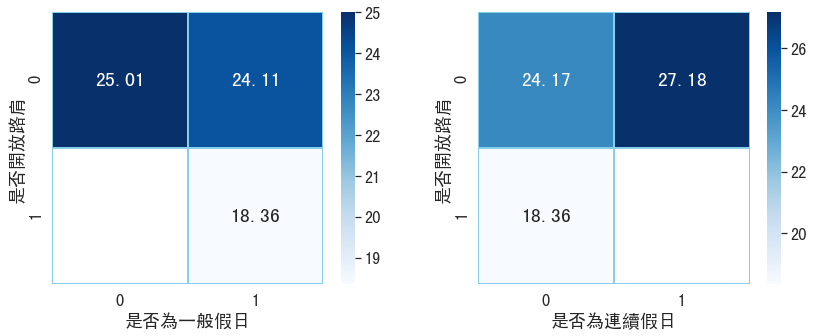

In [697]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax1=sns.heatmap(df_ow1b,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
#plt.title("國1假日 大型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

plt.subplot(1,2,2)
ax1=sns.heatmap(df_ow1bc,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
#plt.title("國1假日 大型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

plt.savefig('路肩vs假日_連續假日_大車熱圖.png')

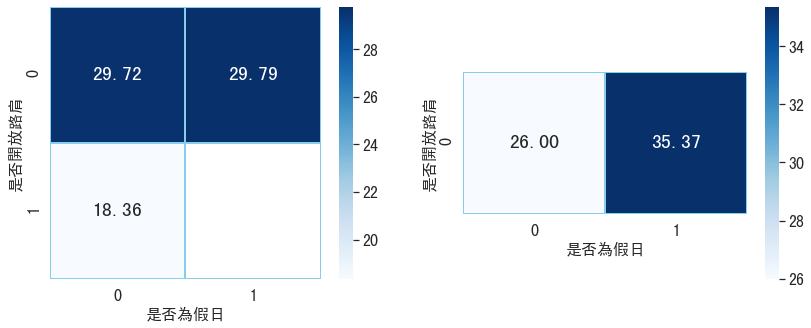

In [574]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax1=sns.heatmap(df_ow1bs,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
#plt.title("國1南向 大型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

plt.subplot(1,2,2)
ax1=sns.heatmap(df_ow1bn,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
#plt.title("國1北向 大型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

#plt.savefig('路肩vs假日_大車南北熱圖.png')

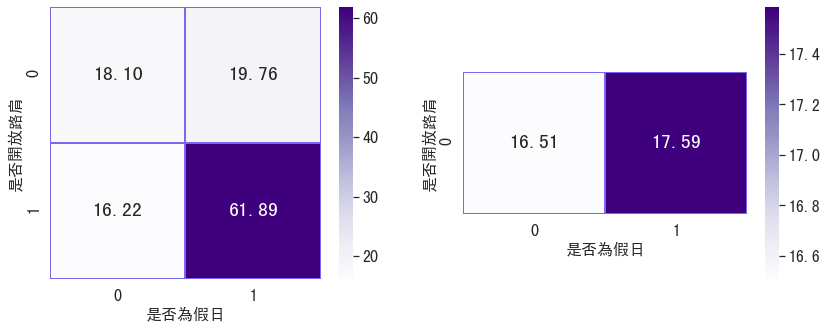

In [575]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax1=sns.heatmap(df_ow1ss,annot=True,fmt=".2f",cmap="Purples",linewidth=1,linecolor="mediumslateblue",square=True,annot_kws={"size":20})
#plt.title("國1南向 小型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

plt.subplot(1,2,2)
ax1=sns.heatmap(df_ow1sn,annot=True,fmt=".2f",cmap="Purples",linewidth=1,linecolor="mediumslateblue",square=True,annot_kws={"size":20})
#plt.title("國1北向 小型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')
plt.savefig('路肩vs假日_小車南北熱圖.png')

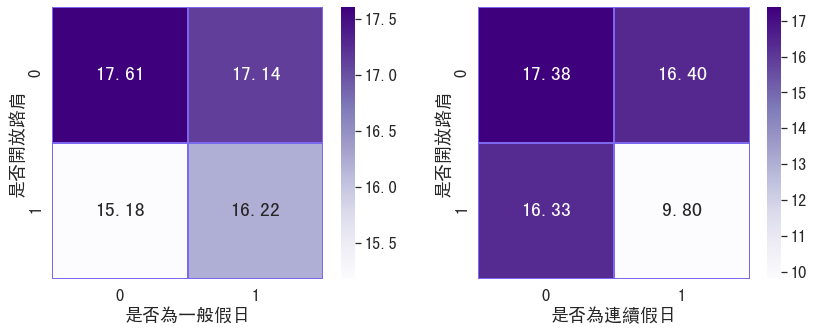

In [696]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax1=sns.heatmap(df_ow1s,annot=True,fmt=".2f",cmap="Purples",linewidth=1,linecolor="mediumslateblue",square=True,annot_kws={"size":20})
#plt.title("國1假日 小型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

plt.subplot(1,2,2)
ax1=sns.heatmap(df_ow1sc,annot=True,fmt=".2f",cmap="Purples",linewidth=1,linecolor="mediumslateblue",square=True,annot_kws={"size":20})
#plt.title("國1連續假日 小型車平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')
plt.savefig('路肩vs假日_連續假日_小車熱圖.png')

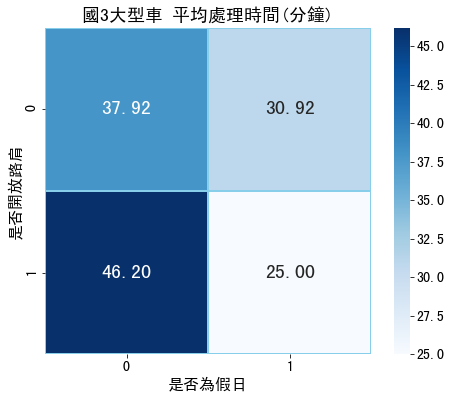

In [91]:
plt.figure(figsize=(8,6))
ax1=sns.heatmap(df_ow3b,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
plt.title("國3大型車 平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

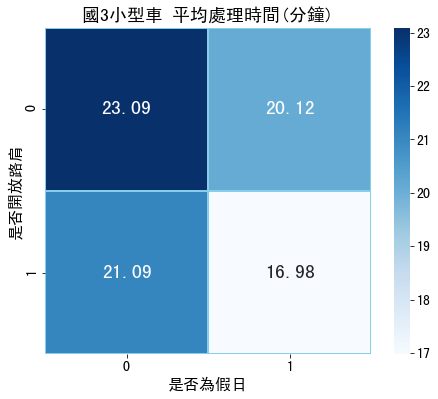

In [92]:
plt.figure(figsize=(8,6))
ax1=sns.heatmap(df_ow3s,annot=True,fmt=".2f",cmap="Blues",linewidth=1,linecolor="skyblue",square=True,annot_kws={"size":20})
plt.title("國3小型車 平均處理時間(分鐘)",fontsize=18)
ax1.set_aspect('equal')

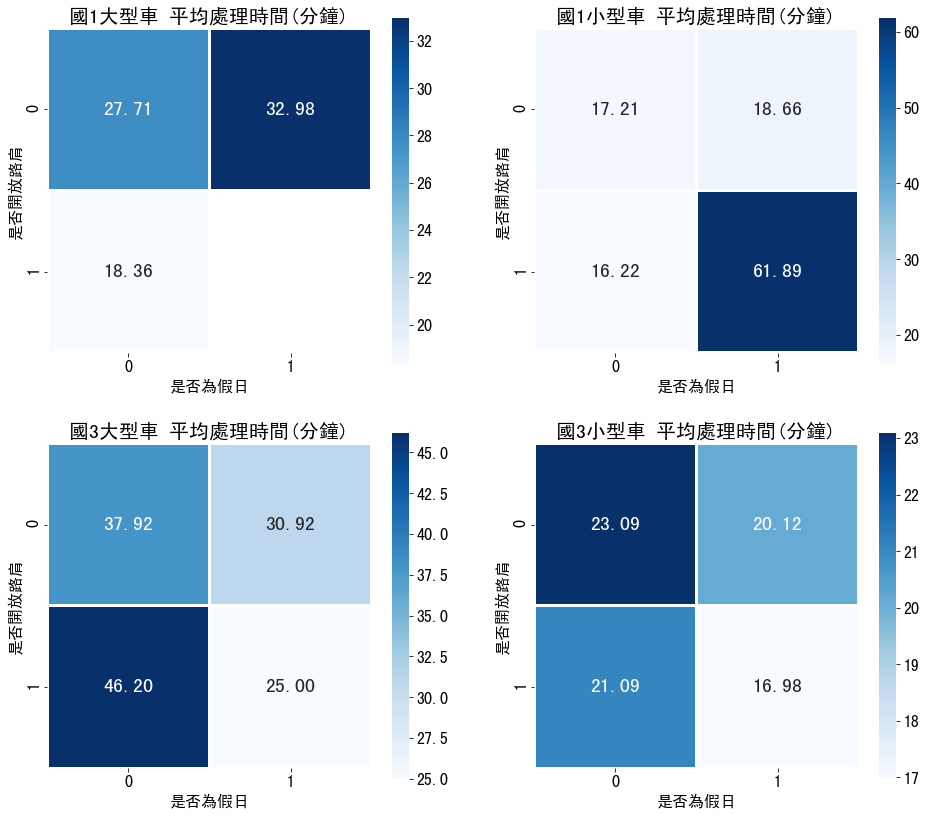

In [9]:
fig,axn = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 14))

ax1 = plt.subplot(2, 2,1)
ax1=sns.heatmap(df_ow1b,annot=True,fmt=".2f",cmap="Blues",linewidth=2,square=True,annot_kws={"size":20})
plt.title("國1大型車 平均處理時間(分鐘)",fontsize=20)
ax1.set_aspect('equal')

ax2 = plt.subplot(2, 2,2)
ax2=sns.heatmap(df_ow1s,annot=True,fmt=".2f",cmap="Blues",linewidth=2,square=True,annot_kws={"size":20})
ax2.set_aspect('equal')
plt.title("國1小型車 平均處理時間(分鐘)",fontsize=20)

ax3 = plt.subplot(2, 2,3)
ax3=sns.heatmap(df_ow3b,annot=True,fmt=".2f",cmap="Blues",linewidth=2,square=True,annot_kws={"size":20})
plt.title("國3大型車 平均處理時間(分鐘)",fontsize=20)
ax3.set_aspect('equal')

ax4 = plt.subplot(2, 2,4)
ax4=sns.heatmap(df_ow3s,annot=True,fmt=".2f",cmap="Blues",linewidth=2,square=True,annot_kws={"size":20})
ax4.set_aspect('equal')
plt.title("國3小型車 平均處理時間(分鐘)",fontsize=20)

plt.show()

In [ ]:
df_romo=df.groupby(by=["國道","星期"])["處理時間"].sum()/df.groupby(by=["國道","星期"])["處理時間"].size()
df_romo=pd.DataFrame(df_romo)
df_romo.reset_index(inplace=True)
df_romo


In [43]:
xx=['%d' %i for i in df_ty["道路型態(子)"]]
xx

['4', '6', '7', '8', '10', '11', '12', '14', '15', '17']

In [ ]:

(一)平交道
01 有遮斷器
02 無遮斷器
(二)交岔路
03 三岔路
04 四岔路
05 多岔路
(三)單路部分
06 隧道
07 地下道
08 橋樑
09 涵洞
10 高架道路
11 彎曲路及附
近
12 坡路
13 巷弄
14 直路
15 其他
(四)圓環廣場
16 圓環
17 廣場

In [ ]:
plt.xticks(arange(len(x)), x)

plt.bar(arange(len(x)),y,width,color='b')

In [64]:
plt.bar(np.arange(16), y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', label='The First Bar', lw=3)
plt.bar(np.arange(16)+0.4, y, alpha=0.2, width=0.3, color='green', edgecolor='blue', label='The Second Bar', lw=3)

8

In [88]:
data1

內容 通報地區  通報級數  \
0     北控通報3級01/01,00:55國1北向43.5K(結報)中線1小車撞護欄事故,01:31...   北控     3   
3     中控通報3級01/01,03:37國1南向172.8k(結報)1小客車撞護欄事故占外路肩,無...   中控     3   
4     中控通報3級01/01,11:08國1北向203k(結報)4小客車追撞事故占內車道,無人受傷...   中控     3   
7     中控通報3級01/01,14:16國1北向164.6k(結報)3小客車追撞事故占外車道,無人...   中控     3   
8     中控通報3級01/01,16:42國1北向132k(結報)2小客車追撞事故占中線車道,無人受...   中控     3   
...                                                 ...  ...   ...   
9713  北控通報3級12/30,19:20國1高架北向19.5K(結報)外線2小車追撞事故,無傷亡,...   北控     3   
9714  北控通報3級12/31,07:20國1高架南向26.7K(結報)2小車追撞外線事故,無傷亡,...   北控     3   
9715  北控通報3級12/31,08:26國1高架南向31.2K(結報)外線2小車追撞事故,無傷亡,...   北控     3   
9716  北控通報3級12/31,13:11國1高架南向55.2K(結報)內線+外線3小車追撞事故,無...   北控     3   
9717  北控通報3級12/31,18:51國1高架北向27.2K(結報)2小自追撞佔用外線事故,無人...   北控     3   

            事故日期   月   日  星期      事件時間  小時 公路名稱  ... 拖板車數  垃圾車數  砂石車數 機車數 警車數  \
0     2019-01-01   1   1   1  00:55:00   0   國1  ...    0     0     0   0   0   
3     2019-01-01   1   1   1  03:37:00   3   國1  ...    0     0     0   0   0   
4     2019-01-01   1   1   1  11:08:00  11   國1  ...    0     0     0   0   0   
7     2019-01-01   1   1   1  14:16:00  14   國1  ...    0     0     0   0   0   
8     2019-01-01   1   1   1  16:42:00  16   國1  ...    0     0     0   0   0   
...          ...  ..  ..  ..       ...  ..  ...  ...  ...   ...   ...  ..  ..   
9713  2019-12-30  12  30   0  19:20:00  19   國1  ...    0     0     0   0   0   
9714  2019-12-31  12  31   1  07:20:00   7   國1  ...    0     0     0   0   0   
9715  2019-12-31  12  31   1  08:26:00   8   國1  ...    0     0     0   0   0   
9716  2019-12-31  12  31   1  13:11:00  13   國1  ...    0     0     0   0   0   
9717  2019-12-31  12  31   1  18:51:00  18   國1  ...    0     0     0   0   0   

     大客車數 曳引車數  救護車數 事故涉及車輛數 大小車  
0       0    0     0       1   b  
3       0    0     0       1   s  
4       0    0     0       4   s  
7       0    0     0       3   s  
8       0    0     0       2   s  
...   ...  ...   ...     ...  ..  
9713    0    0     0       2   s  
9714    0    0     0       2   s  
9715    0    0     0       2   s  
9716    0    0     0       3   s  
9717    0    0     0       2   s  

[7291 rows x 73 columns]

In [420]:
data1["道路型態"]=[str(i).replace("6","隧道") for i in data1["道路型態(子)"]]
data1["道路型態"]=[str(i).replace("17","廣場") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("7","地下道") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("8","橋樑") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("10","高架道路") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("12","坡路") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("14","直路") for i in data1["道路型態"]]
data1["道路型態"]=[str(i).replace("15","其他") for i in data1["道路型態"]]
#data1["道路型態"]=[str(i).replace("17","廣場") for i in data1["道路型態"]]

data1["車種"]=[str(i).replace("s","小型車") for i in data1["大小車"]]
data1["車種"]=[str(i).replace("b","大型車") for i in data1["車種"]]

In [114]:
parameters = {'axes.labelsize': 16
          ,'xtick.labelsize':14,'ytick.labelsize':14}
plt.rcParams.update(parameters)

In [274]:
data1["通報來源"]=[str(i).replace(".0","") for i in data1["通報來源"] ]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [275]:
data1=data1.dropna(how="any")

In [276]:
data2=data1[data1["通報來源"]!="nan"]
data2=data2[data2["通報來源"]!="無"]

In [277]:
data2["通報來源"]=[str(i).replace("1","國1隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("2","國2隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("3","國3隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("4","國4隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("5","國5隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("6","國6隊") for i in data2["通報來源"]]
data2["通報來源"]=[str(i).replace("7","國7隊") for i in data2["通報來源"]]

Text(0.5, 1.0, '各通報來源--交通事故平均處理時間(分鐘)')

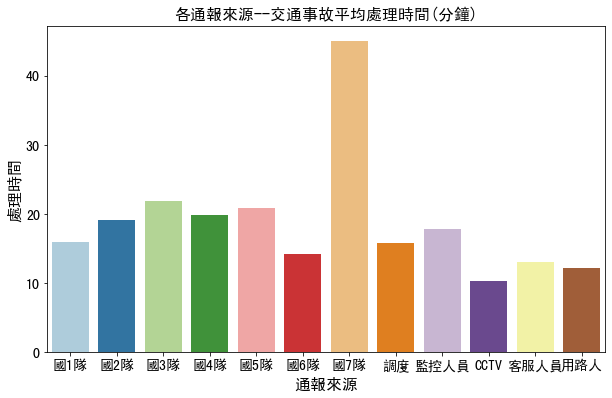

In [196]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=data2["通報來源"],y=data2["處理時間"],data=data2,ci=0,palette="Paired",order=["國1隊","國2隊","國3隊","國4隊","國5隊","國6隊","國7隊","調度","監控人員","CCTV","客服人員","用路人"])
ax.set_title("各通報來源--交通事故平均處理時間(分鐘)",fontsize=16)

Text(0.5, 1.0, '各道路型態--交通事故平均處理時間(分鐘)')

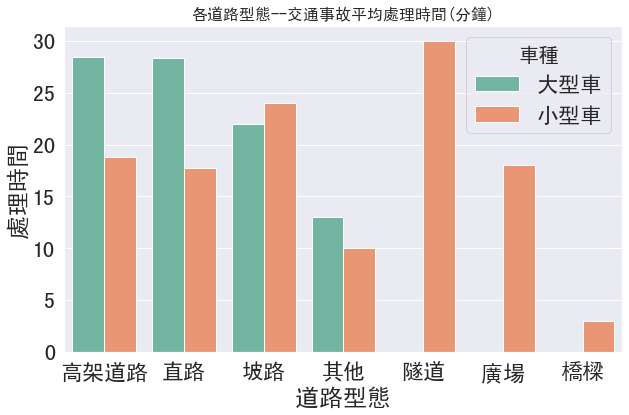

In [422]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=data1["道路型態"],y=data1["處理時間"],hue=data1["車種"],data=data1,ci=0,palette="Set2",order=["高架道路","直路","坡路","其他","隧道","廣場","橋樑"])
ax.set_title("各道路型態--交通事故平均處理時間(分鐘)",fontsize=16)

In [268]:
data1["光線代碼"]=[str(i).replace("1","日間自然光") for i in data1["光線代碼"]]
data1["光線代碼"]=[str(i).replace("2","晨或暮光") for i in data1["光線代碼"]]
data1["光線代碼"]=[str(i).replace("3","夜間有照明") for i in data1["光線代碼"]]
data1["光線代碼"]=[str(i).replace("4","夜間無照明") for i in data1["光線代碼"]]

Text(0.5, 1.0, '各光線代碼--交通事故平均處理時間(分鐘)')

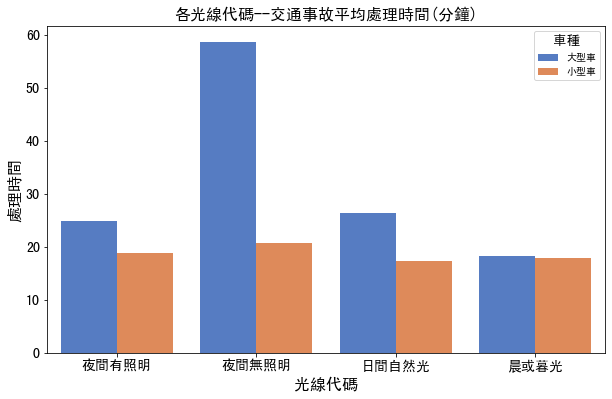

In [221]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=data1["光線代碼"],y=data1["處理時間"],hue=data1["車種"],data=data1,ci=0,palette="muted",saturation=.8)#,order=["高架道路","直路","坡路","其他","隧道","廣場","橋樑"])
ax.set_title("各光線代碼--交通事故平均處理時間(分鐘)",fontsize=16)

In [405]:
per_list=[]

for i in data1b["小時"]:
    if (22<=i<24) or (0<=i<7):
        per="凌晨"
    elif (7<=i<11) or (17<=i<21):
        per="尖峰"
    else:
        
        per="離峰"
    per_list.append(per)
data1b["時段"]=per_list





Text(0.5, 1.0, '不分')

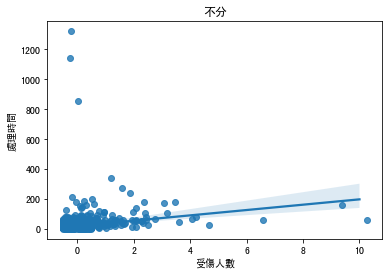

In [76]:
sns.regplot('受傷人數', '處理時間', data=data1,x_jitter=0.5)
plt.title("不分")

In [121]:
data1

內容 通報地區  通報級數  \
0     北控通報3級01/01,00:55國1北向43.5K(結報)中線1小車撞護欄事故,01:31...   北控     3   
1     中控通報3級01/01,03:37國1南向172.8k(結報)1小客車撞護欄事故占外路肩,無...   中控     3   
2     中控通報3級01/01,11:08國1北向203k(結報)4小客車追撞事故占內車道,無人受傷...   中控     3   
3     中控通報3級01/01,14:16國1北向164.6k(結報)3小客車追撞事故占外車道,無人...   中控     3   
4     中控通報3級01/01,16:42國1北向132k(結報)2小客車追撞事故占中線車道,無人受...   中控     3   
...                                                 ...  ...   ...   
7286  北控通報3級12/30,19:20國1高架北向19.5K(結報)外線2小車追撞事故,無傷亡,...   北控     3   
7287  北控通報3級12/31,07:20國1高架南向26.7K(結報)2小車追撞外線事故,無傷亡,...   北控     3   
7288  北控通報3級12/31,08:26國1高架南向31.2K(結報)外線2小車追撞事故,無傷亡,...   北控     3   
7289  北控通報3級12/31,13:11國1高架南向55.2K(結報)內線+外線3小車追撞事故,無...   北控     3   
7290  北控通報3級12/31,18:51國1高架北向27.2K(結報)2小自追撞佔用外線事故,無人...   北控     3   

            事故日期   月   日  星期      事件時間  小時 公路名稱  ... 機車數  警車數  大客車數 曳引車數 救護車數  \
0     2019-01-01   1   1   1  00:55:00   0   國1  ...   0    0     0    0    0   
1     2019-01-01   1   1   1  03:37:00   3   國1  ...   0    0     0    0    0   
2     2019-01-01   1   1   1  11:08:00  11   國1  ...   0    0     0    0    0   
3     2019-01-01   1   1   1  14:16:00  14   國1  ...   0    0     0    0    0   
4     2019-01-01   1   1   1  16:42:00  16   國1  ...   0    0     0    0    0   
...          ...  ..  ..  ..       ...  ..  ...  ...  ..  ...   ...  ...  ...   
7286  2019-12-30  12  30   0  19:20:00  19   國1  ...   0    0     0    0    0   
7287  2019-12-31  12  31   1  07:20:00   7   國1  ...   0    0     0    0    0   
7288  2019-12-31  12  31   1  08:26:00   8   國1  ...   0    0     0    0    0   
7289  2019-12-31  12  31   1  13:11:00  13   國1  ...   0    0     0    0    0   
7290  2019-12-31  12  31   1  18:51:00  18   國1  ...   0    0     0    0    0   

     事故涉及車輛數  大小車  時段  道路型態   車種  
0          1    b  凌晨    直路  大型車  
1          1    s  凌晨    直路  小型車  
2          4    s  離峰    直路  小型車  
3          3    s  離峰    直路  小型車  
4          2    s  離峰    直路  小型車  
...      ...  ...  ..   ...  ...  
7286       2    s  尖峰  高架道路  小型車  
7287       2    s  尖峰  高架道路  小型車  
7288       2    s  尖峰  高架道路  小型車  
7289       3    s  離峰  高架道路  小型車  
7290       2    s  尖峰  高架道路  小型車  

[7291 rows x 76 columns]

In [677]:
#sns.set(font=["SimHei"])
#plt.rcParams["font.sans-serif"]=["SimHei"]


sns.set()
sns.set(font_scale=2)
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')


<Figure size 1728x1008 with 0 Axes>

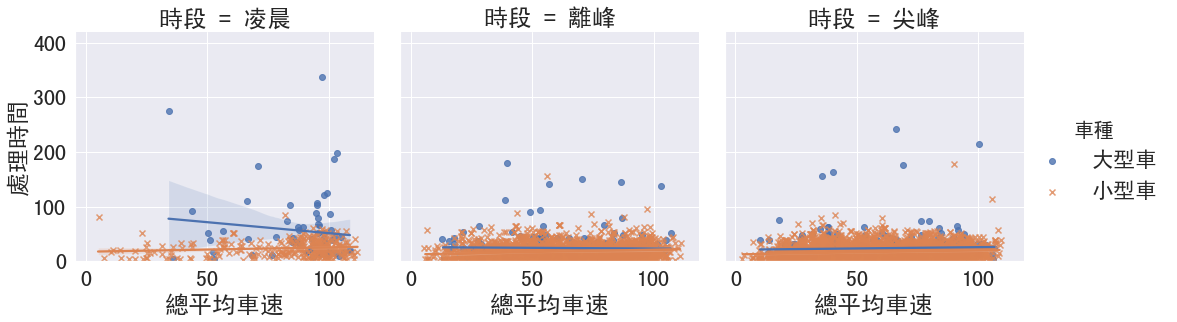

In [312]:

plt.figure(figsize=(24,14))
sns.lmplot(x="總平均車速", y='處理時間', hue="車種",col="時段",data=data1,x_jitter=0.5,markers=["o", "x"])
plt.ylim(0,420)
#plt.xlim(0,8)
#plt.title("受傷人數與平均處理時間 線性回歸關係圖")
plt.savefig('總平均車速與平均處理時間 線性回歸關係圖.png')

In [188]:
data1.columns

Index(['內容', '通報地區', '通報級數', '事故日期', '月', '日', '星期', '事件時間', '小時', '公路名稱',
       '向車道', '路線公里', '路線公尺', '事故', '排除時間', '通報來源', '回堵情況', '處理時間', '縣市',
       '市區鄉鎮', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數', '天候代碼', '光線代碼', '道路類別', '速限',
       '道路型態(主)', '道路型態(子)', '事故位置(主)', '事故位置(子)', '路面狀況-鋪裝', '路面狀況-狀態',
       '路面狀況-缺陷', '道路障礙-障礙物', '道路障礙-視距', '號誌-號誌種類', '號誌-號誌動作',
       '車道劃分設施-分向設施(主)', '車道劃分設施-分向設施(子)', '車道劃分設施-分道設施-快車道或一般車道間',
       '車道劃分設施-分道設施-快慢車道間', '車道劃分設施-分道設施-路面邊線', '事故類型及型態(主)', '事故類型及型態(子)',
       '當事者車種(主)', '當事者車種(子)', '肇因研判(主)', '肇因研判(子)', '里程數', '道路+方向', '是否為連續假日',
       '是否為假日', '是否開放路肩', '時+日', '總通行量', '總平均車速', '小客車數', '小貨車數', '大貨車數',
       '聯結車數', '貨櫃車數', '槽車數', '拖板車數', '垃圾車數', '砂石車數', '機車數', '警車數', '大客車數',
       '曳引車數', '救護車數', '事故涉及車輛數', '大小車', '時段', '道路型態', '車種'],
      dtype='object')

In [262]:
data1["當事者車種(主)"]=[str(i).replace("0","其他") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("1","大客車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("2","大貨車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("3","全聯結車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("4","半聯結車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("5","曳引車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("6","小客車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("7","小貨車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("8","機車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("9","軍車") for i in data1["當事者車種(主)"]]
data1["當事者車種(主)"]=[str(i).replace("10","特種車") for i in data1["當事者車種(主)"]]

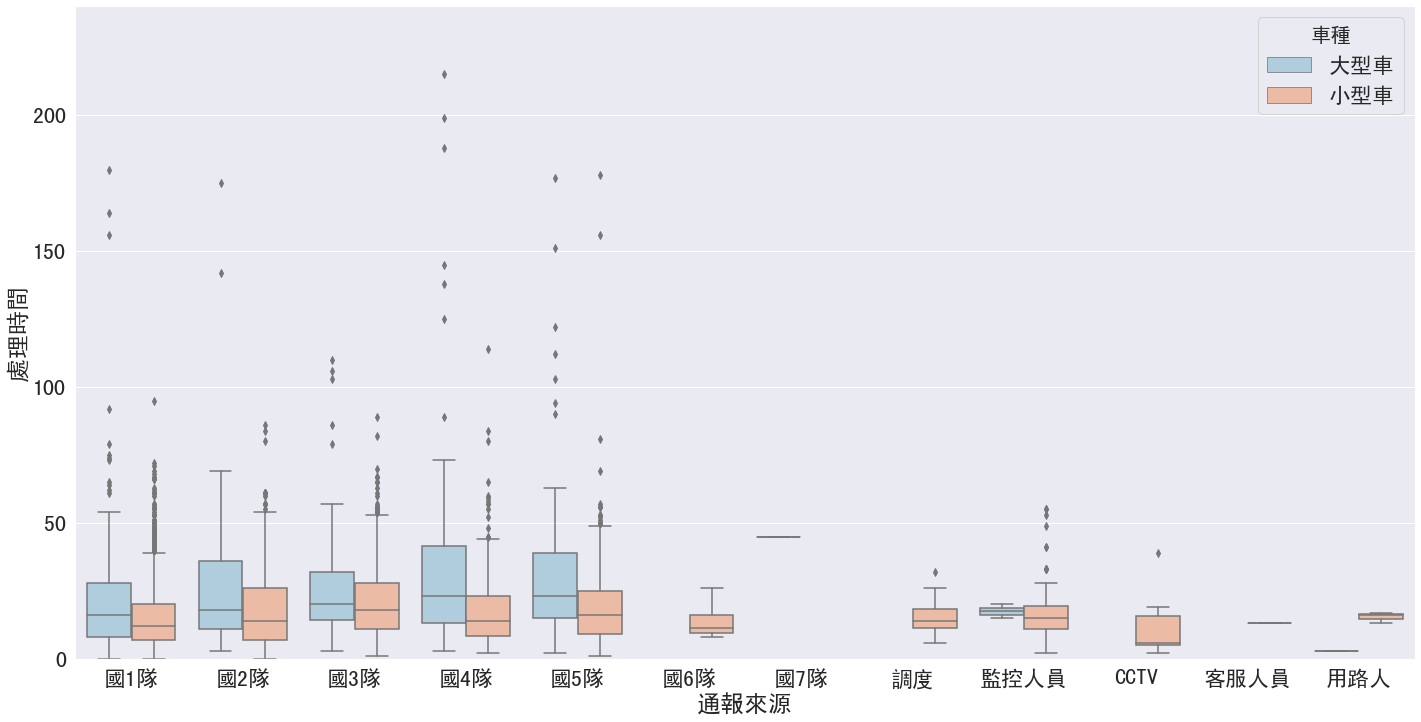

In [580]:
plt.figure(figsize=(24,12))
sns.boxplot(x="通報來源",y="處理時間",data=data2,hue="車種",palette="RdBu_r",order=["國1隊","國2隊","國3隊","國4隊","國5隊","國6隊","國7隊","調度","監控人員","CCTV","客服人員","用路人"])

plt.ylim(0,240)
#plt.title("交通事故--通報來源與處理時間盒狀圖",fontsize=28)
plt.savefig('交通事故--通報來源與處理時間盒狀圖.png')

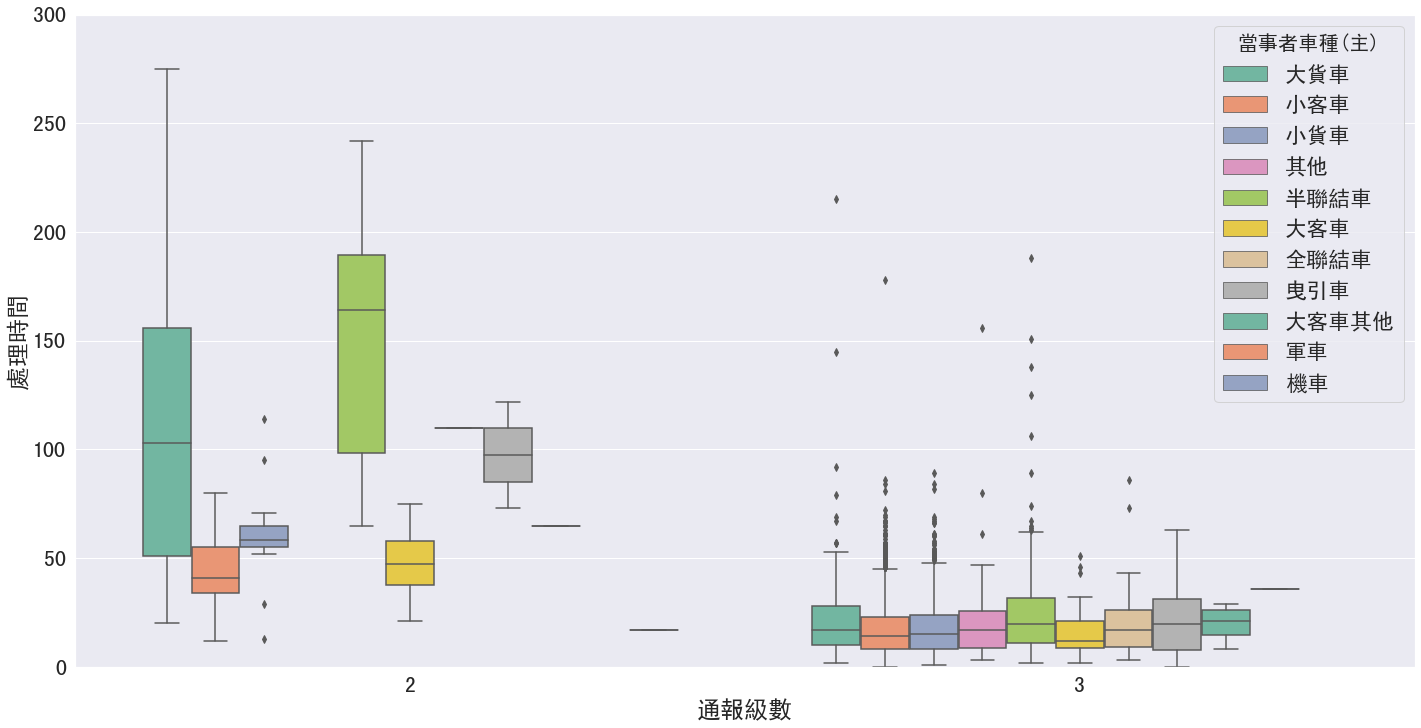

In [581]:
plt.figure(figsize=(24,12))
sns.boxplot(x="通報級數",y="處理時間",data=data1,hue="當事者車種(主)",palette="Set2")

plt.ylim(0,300)
#plt.title("交通事故--當事者車種與處理時間盒狀圖",fontsize=28)
plt.savefig('交通事故--當事者車種與處理時間盒狀圖.png')

In [211]:
data1["肇因研判(主)"]=[str(i).replace("1","駕駛人") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("3","裝載 ") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("4","其他") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("5","無(車輛駕駛人因素") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("6","機件") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("8","交通管制(設施)") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("9","無(非車輛駕駛人因素") for i in data1["肇因研判(主)"]]

In [213]:
data1["肇因研判(主)"]=[str(i).replace("無(非車輛駕駛人因素","無") for i in data1["肇因研判(主)"]]
data1["肇因研判(主)"]=[str(i).replace("無(車輛駕駛人因素","無") for i in data1["肇因研判(主)"]]
                 

In [499]:
data1["事故類型及型態(子)"]=[str(i).replace("10","對撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("11","對向擦撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("12","同向擦撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("13","追撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("14","倒車撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("15","路口交岔撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("16","側撞") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("17","其他") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("18","路上翻車、摔倒") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("19","衝出路外") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("20","撞護欄(樁)") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("23","撞交通島") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("24","撞非固定設施") for i in data1["事故類型及型態(子)"]]
data1["事故類型及型態(子)"]=[str(i).replace("29","其他") for i in data1["事故類型及型態(子)"]]


In [ ]:
lt.figure(figsize=(24,12))
sns.boxplot(x=")",y="處理時間",data=data1,hue="車種",palette="RdBu_r")

In [675]:
order=["撞護欄(樁)","同向擦撞","追撞","其他","側撞","對向擦撞","倒車撞","衝出路外","撞交通島","對撞","路上翻車、摔倒"]

In [ ]:


06 隧道
07 地下道
08 橋樑

10 高架道路

12 坡路

14 直路
15 其他

17 廣場

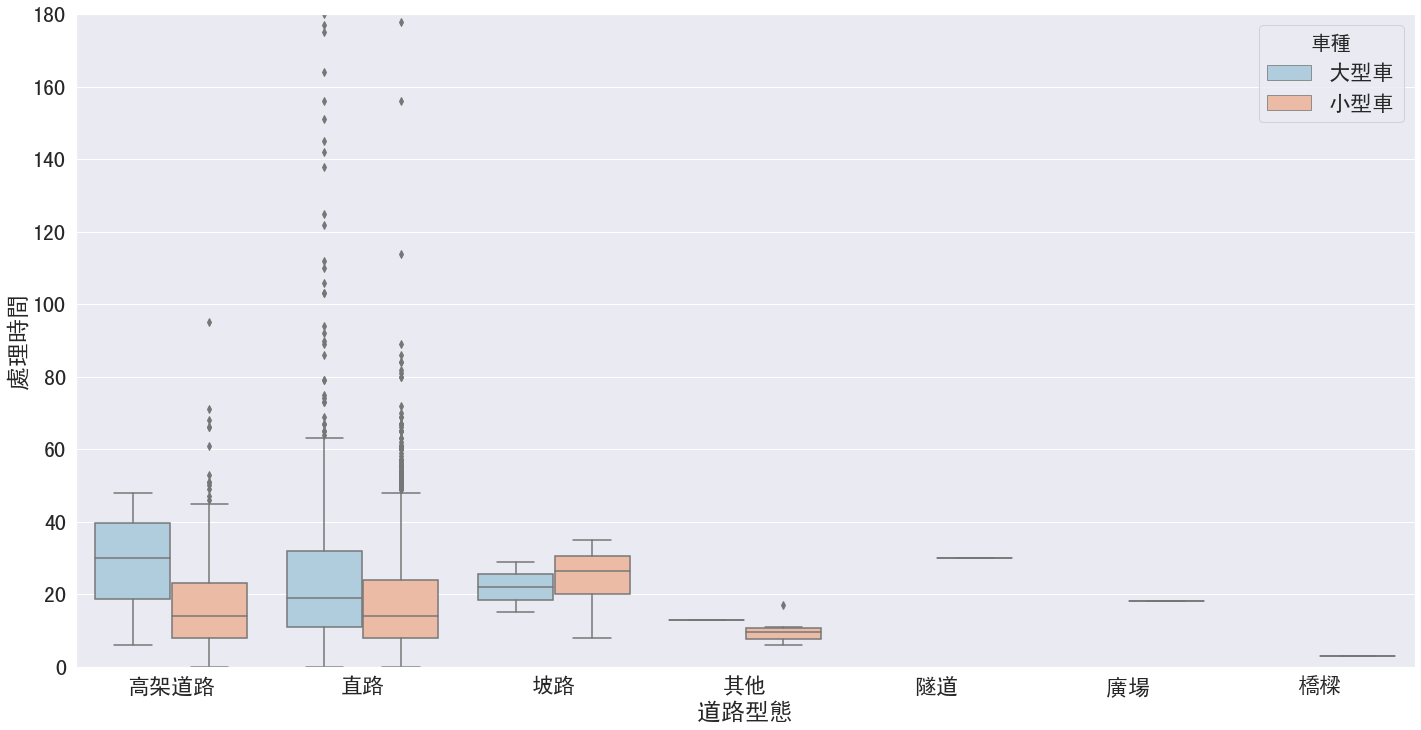

In [582]:
plt.figure(figsize=(24,12))
sns.boxplot(x="道路型態",y="處理時間",data=data1,hue="車種",palette="RdBu_r",order=["高架道路","直路","坡路","其他","隧道","廣場","橋樑"])

plt.ylim(0,180)
#plt.title("交通事故--道路型態與處理時間盒狀圖",fontsize=28)
plt.savefig('交通事故--道路型態與處理時間盒狀圖.png')

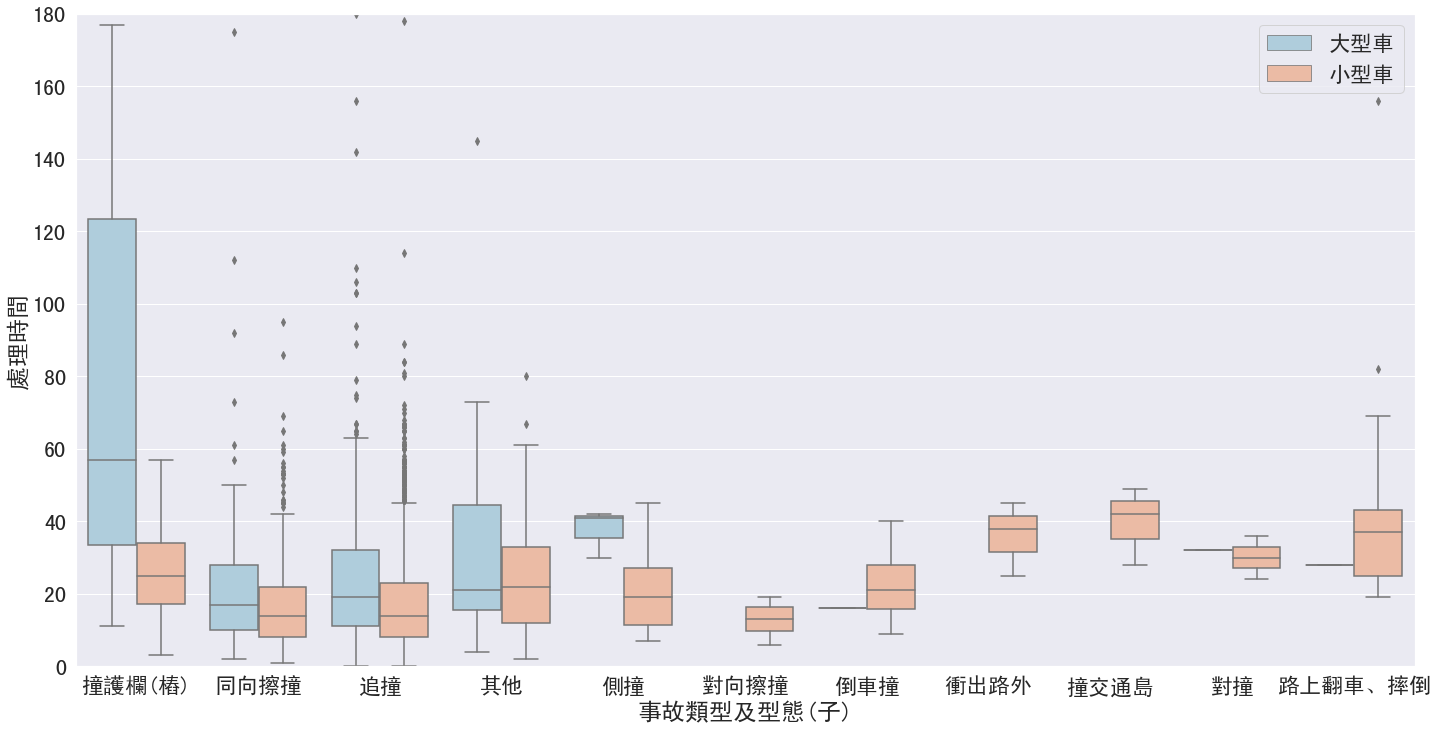

In [680]:
plt.figure(figsize=(24,12))
sns.boxplot(x="事故類型及型態(子)",y="處理時間",data=data1,hue="車種",palette="RdBu_r",order=order)

plt.ylim(0,180)
plt.legend()
#plt.title("交通事故--肇因研判主要類型與處理時間盒狀圖",fontsize=28)
plt.savefig('事故類型及型態(子)與處理時間盒狀圖.png')

In [336]:
data1["天候代碼"]

0       7
1       8
2       8
3       8
4       8
       ..
7286    6
7287    7
7288    7
7289    8
7290    7
Name: 天候代碼, Length: 7242, dtype: int64

In [290]:
parameters = {'axes.labelsize': 16
          ,'xtick.labelsize':14,'ytick.labelsize':14}
plt.rcParams.update(parameters)

<Figure size 1008x432 with 0 Axes>

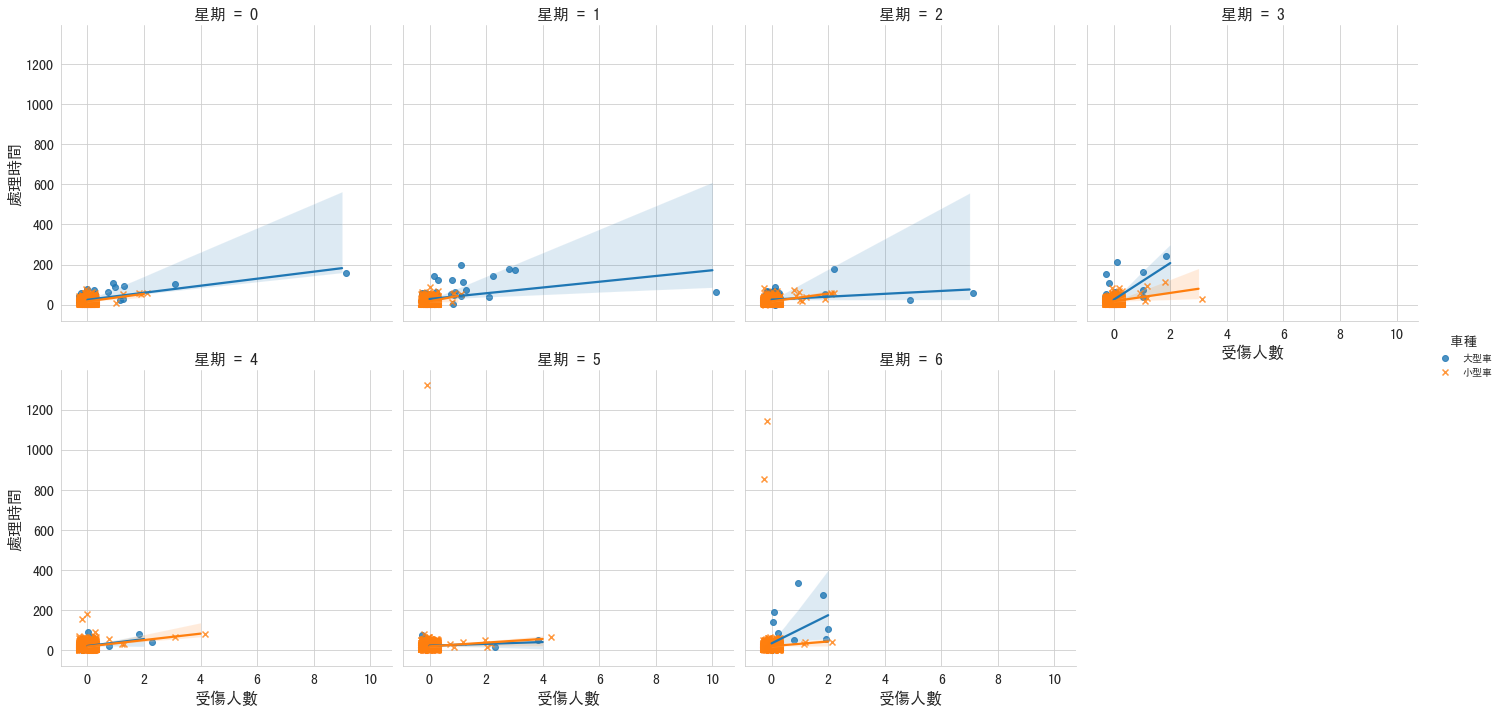

In [143]:
plt.figure(figsize=(14,6))
sns.lmplot(x="受傷人數", y='處理時間', hue="車種", col="星期",col_wrap=4,data=data1,x_jitter=0.3,markers=["o", "x"])

Text(0.5, 1.0, '小車')

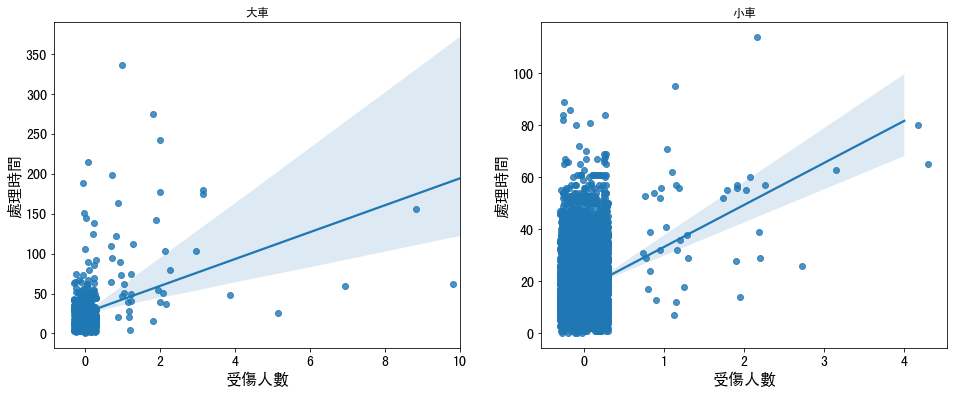

In [111]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot('受傷人數', '處理時間', data=data1b,x_jitter=0.3)
plt.title("大車")
plt.subplot(1,2,2)
sns.regplot('受傷人數', '處理時間', data=data1s,x_jitter=0.3)
plt.title("小車")

Text(0.5, 1.0, '三級')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


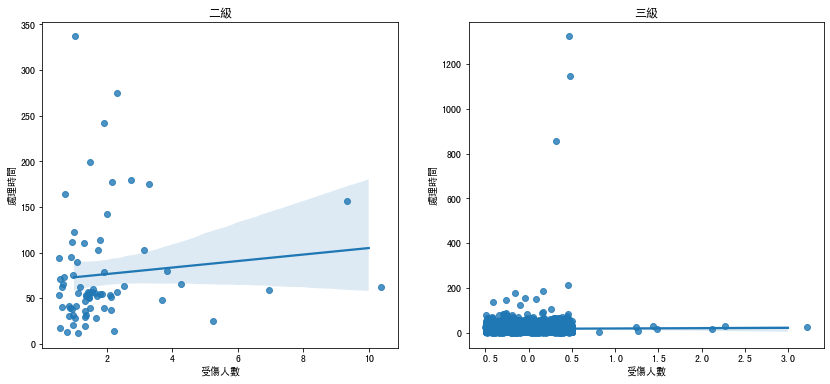

In [74]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('受傷人數', '處理時間', data=data12,x_jitter=0.5)
plt.title("二級")
plt.subplot(1,2,2)
sns.regplot('受傷人數', '處理時間', data=data13,x_jitter=0.5)
plt.title("三級")

Text(0.5, 1.0, '離峰')

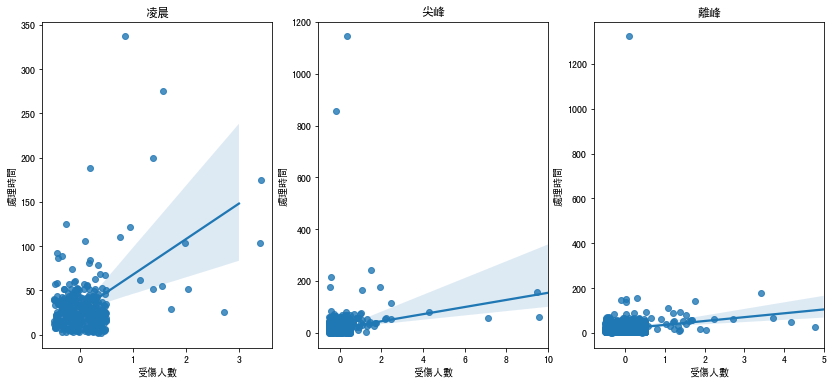

In [73]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.regplot('受傷人數', '處理時間', data=datamid,x_jitter=0.5)
plt.title("凌晨")
plt.subplot(1,3,2)
sns.regplot('受傷人數', '處理時間', data=databu,x_jitter=0.5)
plt.title("尖峰")
plt.subplot(1,3,3)
sns.regplot('受傷人數', '處理時間', data=datase,x_jitter=0.5)
plt.title("離峰")


## 回堵情況 vs 處理時間

In [270]:
data1["回堵情況"]=[str(i).replace("無","0") for i in data1["回堵情況"] ]
data1b["回堵情況"]=[str(i).replace("無","0") for i in data1b["回堵情況"] ]
data1s["回堵情況"]=[str(i).replace("無","0") for i in data1s["回堵情況"] ]

data1["回堵情況"]=data1["回堵情況"].astype("float")
data1b["回堵情況"]=data1b["回堵情況"].astype("float")
data1s["回堵情況"]=data1s["回堵情況"].astype("float")

Text(0.5, 1.0, '不分')

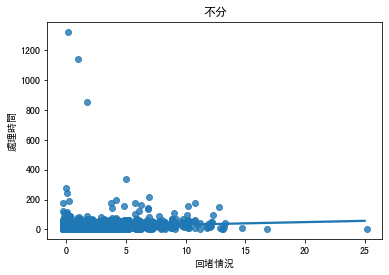

In [72]:
sns.regplot('回堵情況', '處理時間', data=data1,x_jitter=0.3)
plt.title("不分")

Text(0.5, 1.0, '小車')

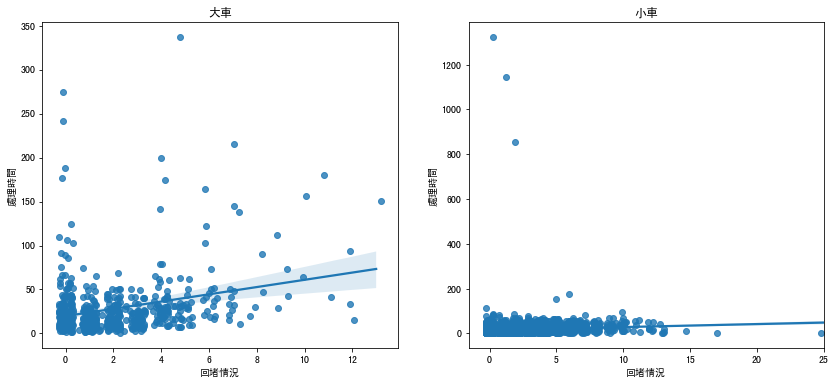

In [71]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('回堵情況', '處理時間', data=data1b,x_jitter=0.3)
plt.title("大車")
plt.subplot(1,2,2)
sns.regplot('回堵情況', '處理時間', data=data1s,x_jitter=0.3)
plt.title("小車")


Text(0.5, 1.0, '三級')

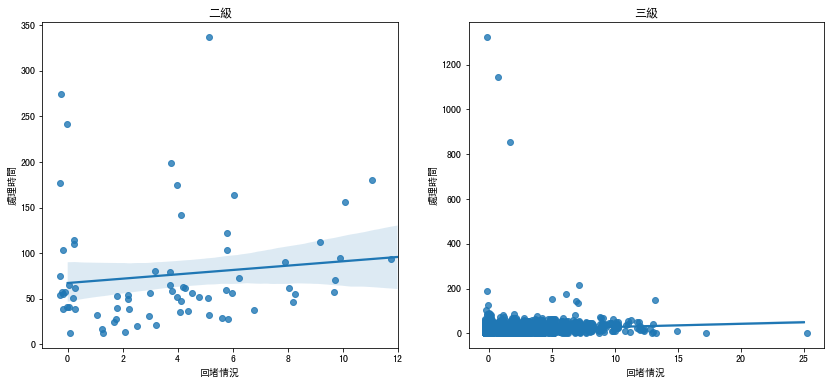

In [70]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('回堵情況', '處理時間', data=data12,x_jitter=0.3)
plt.title("二級")
plt.subplot(1,2,2)
sns.regplot('回堵情況', '處理時間', data=data13,x_jitter=0.3)
plt.title("三級")

Text(0.5, 1.0, '離峰')

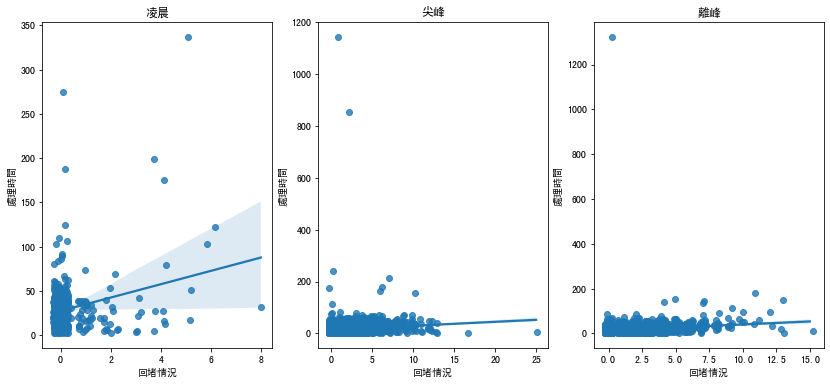

In [69]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.regplot('回堵情況', '處理時間', data=datamid,x_jitter=0.3)
plt.title("凌晨")
plt.subplot(1,3,2)
sns.regplot('回堵情況', '處理時間', data=databu,x_jitter=0.3,)
plt.title("尖峰")
plt.subplot(1,3,3)
sns.regplot('回堵情況', '處理時間', data=datase,x_jitter=0.3,)
plt.title("離峰")

## 事故涉及車輛數 vs 處理時間


Text(0.5, 1.0, '不分')

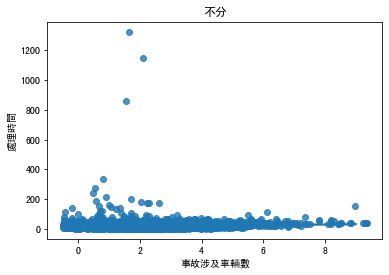

In [80]:
sns.regplot('事故涉及車輛數', '處理時間', data=data1,x_jitter=0.5)
plt.title("不分")

Text(0.5, 1.0, '離峰')

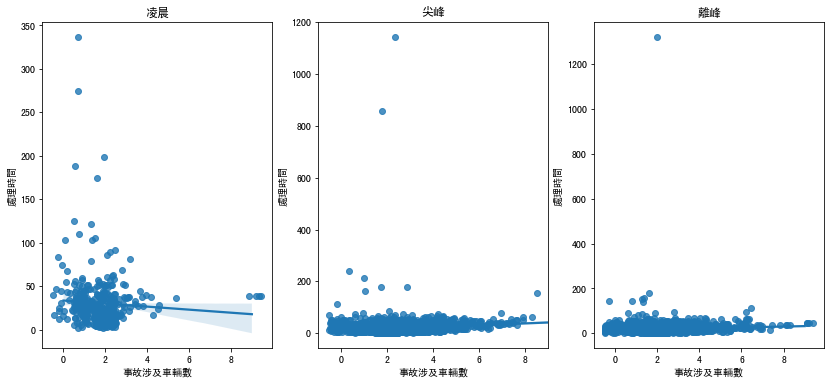

In [78]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.regplot('事故涉及車輛數', '處理時間', data=datamid,x_jitter=0.5)
plt.title("凌晨")
plt.subplot(1,3,2)
sns.regplot('事故涉及車輛數', '處理時間', data=databu,x_jitter=0.5)
plt.title("尖峰")
plt.subplot(1,3,3)
sns.regplot('事故涉及車輛數', '處理時間', data=datase,x_jitter=0.5)
plt.title("離峰")

Text(0.5, 1.0, '三級')

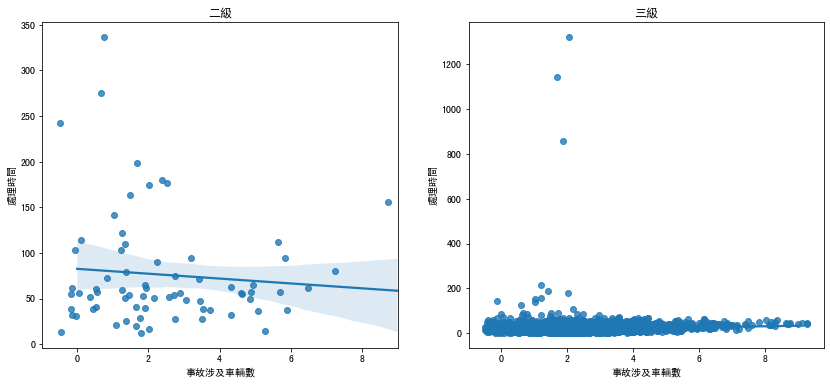

In [65]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('事故涉及車輛數', '處理時間', data=data12,x_jitter=0.5)
plt.title("二級")
plt.subplot(1,2,2)
sns.regplot('事故涉及車輛數', '處理時間', data=data13,x_jitter=0.5)
plt.title("三級")

Text(0.5, 1.0, '小車')

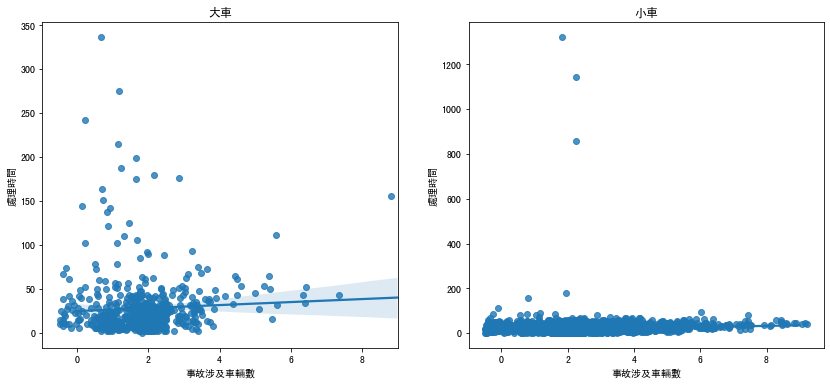

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('事故涉及車輛數', '處理時間', data=data1b,x_jitter=0.5)
plt.title("大車")
plt.subplot(1,2,2)
sns.regplot('事故涉及車輛數', '處理時間', data=data1s,x_jitter=0.5,)
plt.title("小車")

## 總通行量 vs 處理時間


Text(0.5, 1.0, '不分')

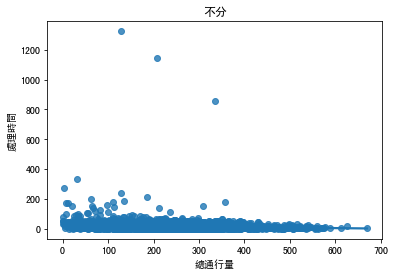

In [56]:
sns.regplot('總通行量', '處理時間', data=data1)
plt.title("不分")

Text(0.5, 1.0, '小車')

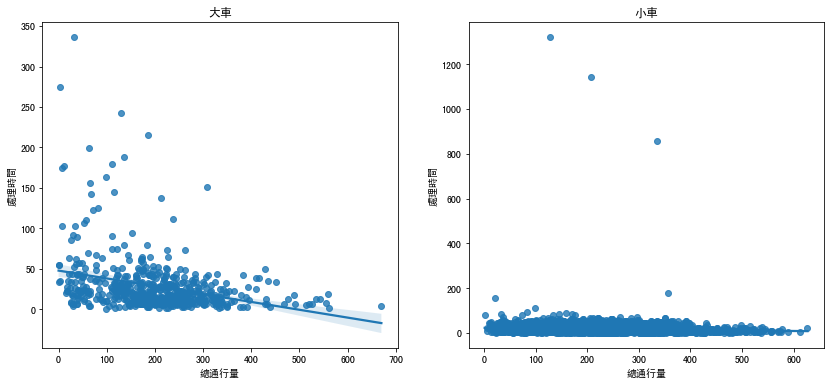

In [35]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('總通行量', '處理時間', data=data1b)
plt.title("大車")
plt.subplot(1,2,2)
sns.regplot('總通行量', '處理時間', data=data1s)
plt.title("小車")


In [36]:
data12=data1[data1["通報級數"]==2] #通報級數2
data13=data1[data1["通報級數"]==3] #通報級數3

Text(0.5, 1.0, '三級')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


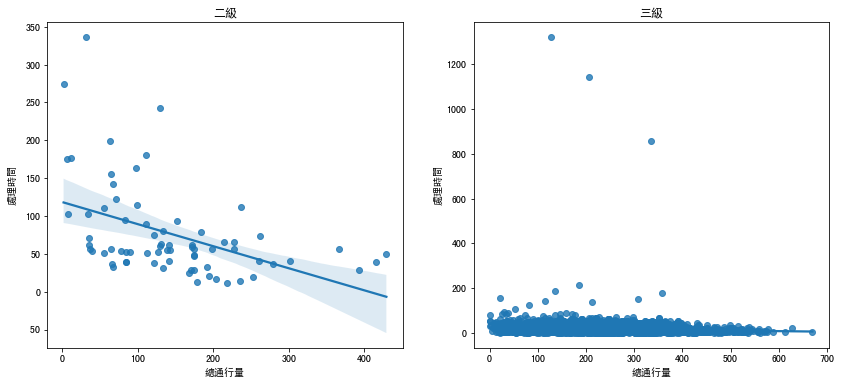

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('總通行量', '處理時間', data=data12)
plt.title("二級")
plt.subplot(1,2,2)
sns.regplot('總通行量', '處理時間', data=data13)
plt.title("三級")


In [37]:
datamid=data1[data1["時段"]=="凌晨"]
databu=data1[data1["時段"]=="尖峰"]
datase=data1[data1["時段"]=="離峰"]

Text(0.5, 1.0, '離峰')

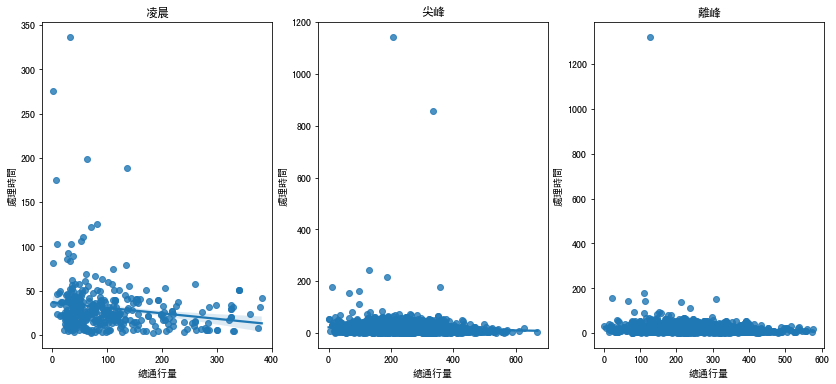

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.regplot('總通行量', '處理時間', data=datamid)
plt.title("凌晨")
plt.subplot(1,3,2)
sns.regplot('總通行量', '處理時間', data=databu)
plt.title("尖峰")
plt.subplot(1,3,3)
sns.regplot('總通行量', '處理時間', data=datase)
plt.title("離峰")

## 總平均車速 vs 處理時間

Text(0.5, 1.0, '不分')

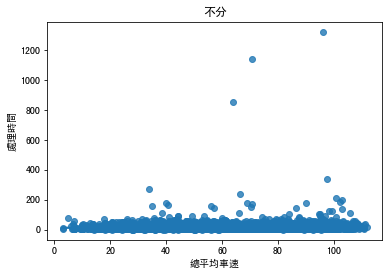

In [57]:
sns.regplot('總平均車速', '處理時間', data=data1)
plt.title("不分")

Text(0.5, 1.0, '小車')

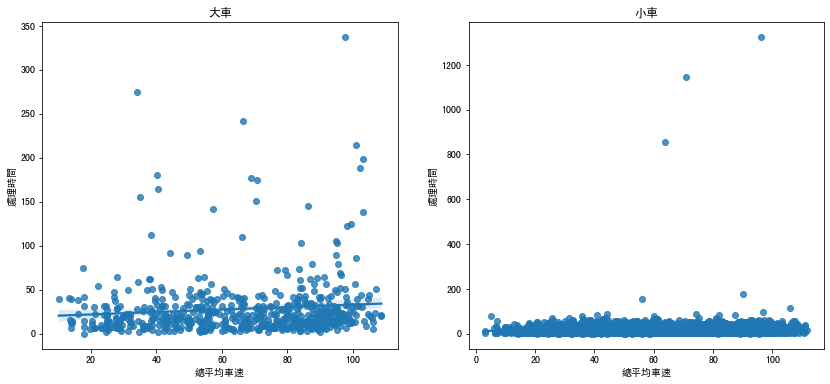

In [58]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('總平均車速', '處理時間', data=data1b)
plt.title("大車")
plt.subplot(1,2,2)
sns.regplot('總平均車速', '處理時間', data=data1s)
plt.title("小車")

Text(0.5, 1.0, '三級')

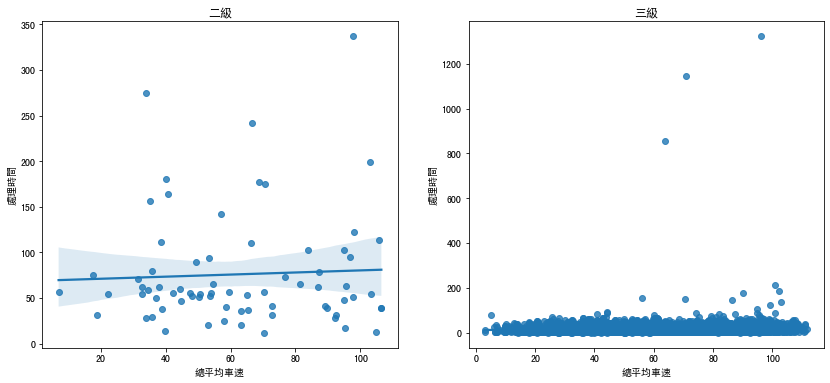

In [60]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot('總平均車速', '處理時間', data=data12)
plt.title("二級")
plt.subplot(1,2,2)
sns.regplot('總平均車速', '處理時間', data=data13)
plt.title("三級")

Text(0.5, 1.0, '離峰')

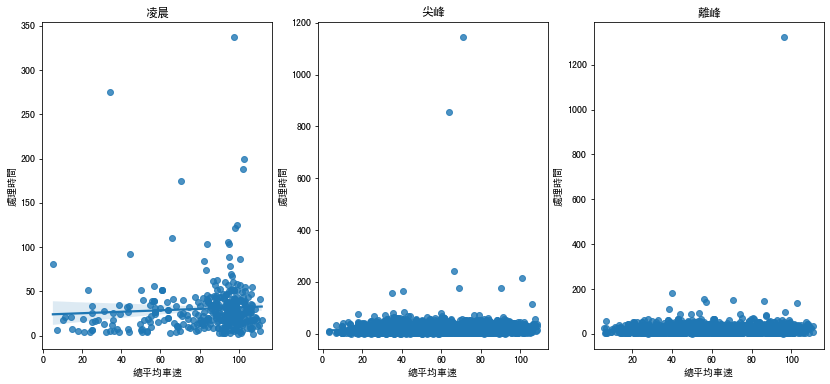

In [59]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.regplot('總平均車速', '處理時間', data=datamid)
plt.title("凌晨")
plt.subplot(1,3,2)
sns.regplot('總平均車速', '處理時間', data=databu)
plt.title("尖峰")
plt.subplot(1,3,3)
sns.regplot('總平均車速', '處理時間', data=datase)
plt.title("離峰")

In [243]:
data3=data1[data1["處理時間"]<=240]

In [293]:
data1.groupby(by="通報級數")["處理時間"].mean()

通報級數
2    76.097222
3    18.049965
Name: 處理時間, dtype: float64

In [294]:
data2=data1[data1["處理時間"]<=240]

Text(0.5, 1.0, '各通報級數--交通事故平均處理時間(分鐘)')

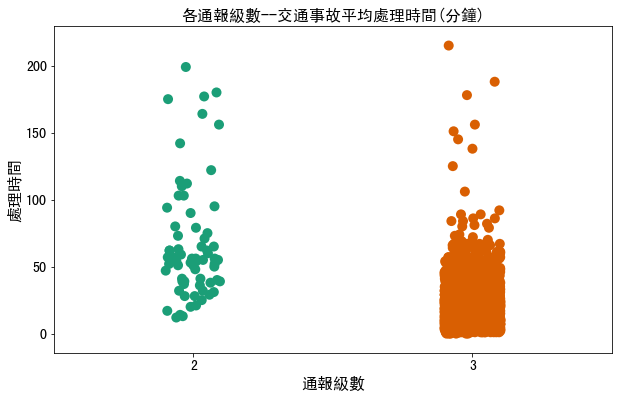

In [299]:
plt.figure(figsize=(10,6))
ax=sns.stripplot(x="通報級數",y="處理時間",data=data2, jitter=True,palette="Dark2",dodge=True,s=10)  # 是否拆分
#ax.set_xticks(0,180)
ax.set_title("各通報級數--交通事故平均處理時間(分鐘)",fontsize=16)

Text(0.5, 1.0, '各通報級數--交通事故平均處理時間(分鐘)')

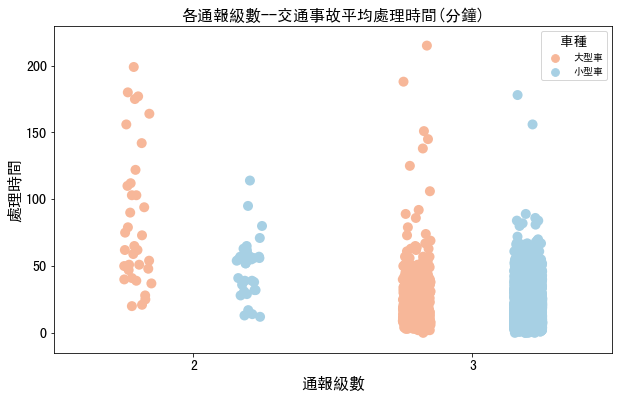

In [301]:
plt.figure(figsize=(10,6))
ax=sns.stripplot(x="通報級數",y="處理時間",hue="車種",data=data2, jitter=True,palette="RdBu",dodge=True,s=10)  # 是否拆分
#ax.set_xticks(0,180)
ax.set_title("各通報級數--交通事故平均處理時間(分鐘)",fontsize=16)

In [251]:
data3n=data3[data3["向車道"]=="北"]
data3s=data3[data3["向車道"]=="南"]

Text(0.5, 1.0, '各時段--交通事故平均處理時間(分鐘)')

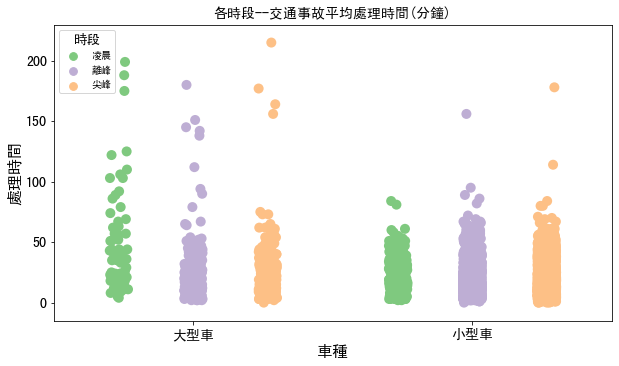

In [258]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
ax1=sns.stripplot(x="車種", y="處理時間", hue="時段",data=data3, jitter=True,palette="Accent",dodge=True,s=10)  # 是否拆分
ax1.set_title("各時段--交通事故平均處理時間(分鐘)",fontsize=14)

Text(0.5, 1.0, '各時段(南)--交通事故平均處理時間(分鐘)')

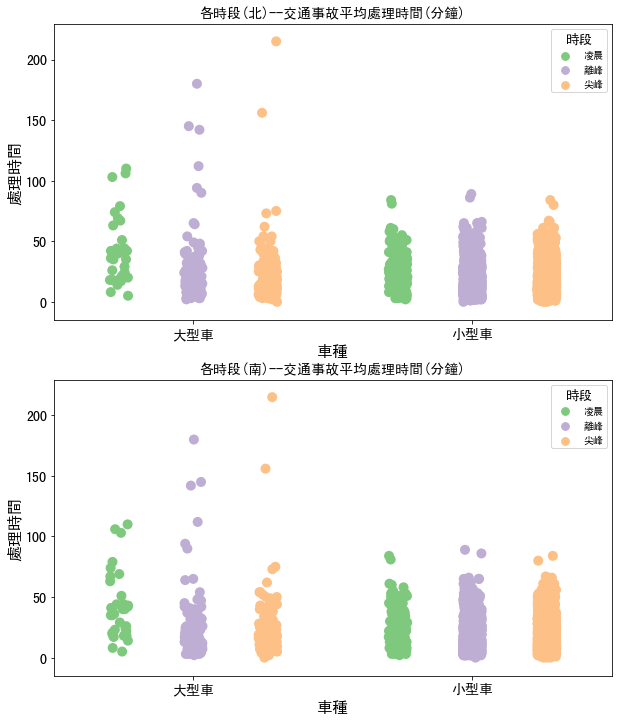

In [256]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
ax1=sns.stripplot(x="車種", y="處理時間", hue="時段",data=data3n, jitter=True,palette="Accent",dodge=True,s=10)  # 是否拆分
ax1.set_title("各時段(北)--交通事故平均處理時間(分鐘)",fontsize=14)
plt.subplot(2,1,2)
ax2=sns.stripplot(x="車種", y="處理時間", hue="時段",data=data3n, jitter=True,palette="Accent",dodge=True,s=10)  # 是否拆分

#ax.set_xticks(0,18010
ax2.set_title("各時段(南)--交通事故平均處理時間(分鐘)",fontsize=14)

In [75]:
df_ty1s=data1s.groupby(by=["道路型態(子)"])["處理時間"].mean() #6 隧道 12 坡路
df_ty1s=pd.DataFrame(df_ty1s)
df_ty1s.reset_index(inplace=True)
df_ty1s

道路型態(子)       處理時間
0        6  30.000000
1        7  15.500000
2        8   3.000000
3       10  16.794521
4       12  24.000000
5       14  17.337529
6       15  10.000000
7       17  18.000000

In [76]:
df_ty1b=data1b.groupby(by=["道路型態(子)"])["處理時間"].mean() #6 隧道 12 坡路
df_ty1b=pd.DataFrame(df_ty1b)
df_ty1b.reset_index(inplace=True)
df_ty1b

道路型態(子)       處理時間
0       10  28.500000
1       12  22.000000
2       14  24.107078
3       15  13.000000

In [87]:
data.groupby(by=["光線代碼"])["處理時間"].mean()  #4 夜間無照明

光線代碼
1    18.898852
2    18.830258
3    20.182188
4    25.770328
Name: 處理時間, dtype: float64

In [88]:
data.groupby(by=["小時"])["處理時間"].mean()

小時
0     29.020833
1     29.318182
2     25.735294
3     39.871795
4     51.487179
5     34.192982
6     35.285714
7     17.845283
8     16.681034
9     19.173486
10    18.383758
11    19.728314
12    18.614525
13    20.101523
14    21.966957
15    19.105714
16    17.689466
17    18.987884
18    18.501618
19    19.772487
20    19.011070
21    22.009804
22    26.234375
23    31.955882
Name: 處理時間, dtype: float64

In [90]:
data.groupby(by=["肇因研判(主)"])["處理時間"].mean()  #8 )交通管制(設施) 

肇因研判(主)
1    18.869595
3    27.666667
4    26.634021
5    27.666667
6    39.770270
8    51.000000
9    17.444444
Name: 處理時間, dtype: float64

In [89]:
data.groupby(by=["肇因研判(子)"])["處理時間"].mean() #13超速失控   50其他引起事故之故障  65其他交通管制不當

肇因研判(子)
1     15.750000
2     16.000000
7     19.243158
8     15.500000
9     16.000000
12    20.833333
13    54.285714
14    23.958333
16    18.459895
17    17.928571
18    16.000000
19    10.000000
21    21.680000
22    33.647059
23    19.549527
26    23.833333
30    24.800000
31    33.666667
32    35.000000
35    30.400000
37    29.000000
38    16.666667
39    34.666667
41    29.000000
42    26.750369
43    25.197674
44    27.666667
47    33.000000
48    39.196429
49    28.666667
50    57.125000
65    51.000000
66    23.000000
67    16.333333
Name: 處理時間, dtype: float64

In [91]:
data.groupby(by=["當事者車種(子)"])["處理時間"].mean() #A22  全聯結車 自用

當事者車種(子)
A02      31.833333
A04      31.052632
A05      23.214286
A11      25.000000
A12      31.190476
A21      32.750000
A22      91.500000
A31      32.600746
A32      65.909091
A41      26.365385
A42      20.636364
B01      15.718750
B02      18.087193
B03      18.606478
B11      20.333333
B12      19.652426
C03      23.000000
D03      36.000000
E03      28.600000
E05      21.000000
G06      19.000000
None     22.814815
Name: 處理時間, dtype: float64

In [92]:
data.groupby(by=["公路名稱"])["處理時間"].mean()

公路名稱
國1    18.635990
國3    22.809170
國5    31.285714
Name: 處理時間, dtype: float64

In [105]:
#data["通報來源"]=data["通報來源"].astype("object")
data["通報來源"]=[str(i).replace(".0","") for i in data["通報來源"] ]

In [104]:
data.groupby(by=["通報來源"])["處理時間"].mean() #國8隊

通報來源
1       15.965159
2       20.554135
3       21.833219
4       19.802857
5       21.176367
6       21.458525
7       23.365672
8       27.154839
9       22.754098
CCTV    14.218750
IID     30.000000
nan     20.404762
客服人員    13.000000
無        8.000000
用路人     24.333333
監控人員    18.401460
調度      15.875000
Name: 處理時間, dtype: float64

In [256]:
data.groupby(by=["星期","小時"])["處理時間"].mean()

星期  小時
0   0     23.750000
    1     20.666667
    2     23.000000
    3     35.600000
    4     21.000000
            ...    
6   19    16.948718
    20    16.932039
    21    20.080460
    22    27.272727
    23    52.111111
Name: 處理時間, Length: 168, dtype: float64

In [365]:
data1["天候代碼"]=[str(i).replace("1","暴雨") for i in data1["天候代碼"]]
data1["天候代碼"]=[str(i).replace("3","風沙") for i in data1["天候代碼"]]
data1["天候代碼"]=[str(i).replace("4","霧或煙") for i in data1["天候代碼"]]
data1["天候代碼"]=[str(i).replace("6","雨") for i in data1["天候代碼"]]
data1["天候代碼"]=[str(i).replace("7","陰") for i in data1["天候代碼"]]
data1["天候代碼"]=[str(i).replace("8","晴") for i in data1["天候代碼"]]
#plt.xticks(ticks=(1,3,4,6,7,8),labels=("暴雨","風沙","霧或煙","雨","陰","晴"))

In [375]:
data1.columns

Index(['內容', '通報地區', '通報級數', '事故日期', '月', '日', '星期', '事件時間', '小時', '公路名稱',
       '向車道', '路線公里', '路線公尺', '事故', '排除時間', '通報來源', '回堵情況', '處理時間', '縣市',
       '市區鄉鎮', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數', '天候代碼', '光線代碼', '道路類別', '速限',
       '道路型態(主)', '道路型態(子)', '事故位置(主)', '事故位置(子)', '路面狀況-鋪裝', '路面狀況-狀態',
       '路面狀況-缺陷', '道路障礙-障礙物', '道路障礙-視距', '號誌-號誌種類', '號誌-號誌動作',
       '車道劃分設施-分向設施(主)', '車道劃分設施-分向設施(子)', '車道劃分設施-分道設施-快車道或一般車道間',
       '車道劃分設施-分道設施-快慢車道間', '車道劃分設施-分道設施-路面邊線', '事故類型及型態(主)', '事故類型及型態(子)',
       '當事者車種(主)', '當事者車種(子)', '肇因研判(主)', '肇因研判(子)', '里程數', '道路+方向', '是否為連續假日',
       '是否為假日', '是否開放路肩', '時+日', '總通行量', '總平均車速', '小客車數', '小貨車數', '大貨車數',
       '聯結車數', '貨櫃車數', '槽車數', '拖板車數', '垃圾車數', '砂石車數', '機車數', '警車數', '大客車數',
       '曳引車數', '救護車數', '事故涉及車輛數', '大小車', '時段', '道路型態', '車種'],
      dtype='object')

In [415]:
data1b["處理時間"].describe()

count    572.000000
mean      28.321678
std       34.181928
min        0.000000
25%       11.000000
50%       19.000000
75%       32.000000
max      337.000000
Name: 處理時間, dtype: float64

In [593]:
d=data1.groupby(by=["光線代碼",'事故類型及型態(子)'])["處理時間"].mean()  #假日且開放df路肩 最長
d=pd.DataFrame(d)
d.reset_index(inplace=True)
d=d.pivot("光線代碼",'事故類型及型態(子)',"處理時間")
d

事故類型及型態(子)        倒車撞         側撞         其他       同向擦撞  對向擦撞         對撞  \
光線代碼                                                                      
夜間有照明       20.000000  24.555556  23.095238  20.699029  15.5        NaN   
夜間無照明             NaN  11.000000  41.000000  21.363636   NaN        NaN   
日間自然光       22.333333  21.318182  26.294118  18.062626  11.5  30.666667   
晨或暮光              NaN  24.000000   5.500000  22.642857   NaN        NaN   

事故類型及型態(子)       撞交通島     撞護欄(樁)  撞非固定設施   衝出路外    路上翻車、摔倒         追撞  
光線代碼                                                                   
夜間有照明             NaN  29.150943     NaN    NaN  28.000000  18.444102  
夜間無照明             NaN  31.100000     NaN    NaN  43.000000  23.771987  
日間自然光       39.666667  31.800000    14.0  80.75  46.461538  17.257317  
晨或暮光              NaN  27.000000     NaN    NaN  25.000000  17.214286

In [585]:

sns.set()
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style({"font.sans-serif":["SimHei"]})

#sns.set_context('talk')

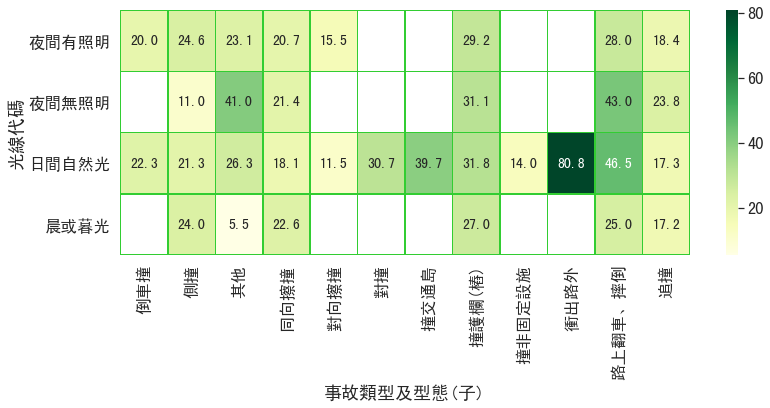

In [594]:
plt.figure(figsize=(12,6))
sns.heatmap(d,annot=True,fmt=".1f",linewidth=0.5,linecolor='limegreen',cmap="YlGn",annot_kws={"size":14})
#plt.title("交通事故--國1天候代碼vs事故類型及型態(子)處理時間(分鐘)",fontsize=20)
plt.tight_layout()
#plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('交通事故--國1光線代碼vs事故類型及型態(子)處理時間(分鐘).png')

In [658]:
df_wh=df1.groupby(by=["小時","星期"])["處理分鐘"].mean()  #假日且開放df路肩 最長
df_wh=pd.DataFrame(df_wh)
df_wh.reset_index(inplace=True)

df_wh=df_wh.pivot("小時","星期","處理分鐘")
df_wh

星期          0          1          2          3          4          5  \
小時                                                                     
0   25.555556  22.333333  24.296296  22.250000  35.545455  23.612903   
1   28.608696  22.421053  21.222222  26.821429  26.318182  21.333333   
2   31.071429  25.312500  25.612903  20.000000  26.818182  21.888889   
3   30.681818  28.120000  22.083333  27.333333  22.904762  35.076923   
4   25.500000  32.333333  30.440000  31.407407  26.444444  23.500000   
5   26.980000  23.720930  28.450000  26.785714  27.488372  30.114286   
6   26.628319  27.706294  28.106061  28.301724  26.830645  25.560000   
7   26.000000  26.927835  32.835052  27.489362  29.934343  24.170732   
8   25.848485  28.459144  25.441667  26.713656  28.362385  27.578035   
9   25.972727  29.041860  27.360731  25.342723  27.114894  27.111111   
10  27.830435  26.232227  25.563452  25.515982  24.427350  26.105263   
11  26.037559  26.242857  27.290456  29.774038  27.746544  24.697802   
12  26.614286  27.659292  24.403141  29.936170  26.200000  25.066351   
13  25.526066  28.154545  26.514151  29.658879  26.805430  25.903030   
14  27.511111  25.176991  26.004902  26.886076  25.678899  25.235294   
15  28.291209  28.419214  27.427907  28.226131  27.753623  29.245902   
16  29.286408  25.140909  28.572115  26.866667  25.757895  27.496689   
17  28.520325  22.936416  26.805556  27.624277  27.520619  23.937500   
18  24.094340  25.705882  20.254545  22.045455  21.398551  23.578313   
19  21.492537  22.404255  25.365079  24.673077  22.355769  20.928571   
20  27.195652  25.217391  22.595238  25.238095  27.278689  24.851852   
21  26.000000  24.021277  28.156250  24.634146  26.527273  19.650000   
22  24.735294  22.894737  19.567568  23.227273  24.725000  25.272727   
23  25.095238  24.533333  31.481481  33.222222  30.928571  20.259259   

星期          6  
小時             
0   23.576923  
1   25.600000  
2   27.896552  
3   30.083333  
4   29.263158  
5   24.638889  
6   27.012658  
7   25.070175  
8   22.521429  
9   24.606838  
10  30.272727  
11  24.000000  
12  23.020202  
13  24.720000  
14  26.962264  
15  28.715517  
16  25.099174  
17  22.736842  
18  23.358491  
19  24.125000  
20  18.537037  
21  18.848485  
22  22.311111  
23  22.833333

In [596]:
df_wh1ss=data1ss.groupby(by=["小時","星期"])["處理時間"].mean()  #假日且開放df路肩 最長
df_wh1ss=pd.DataFrame(df_wh1ss)
df_wh1ss.reset_index(inplace=True)
df_wh1ss=df_wh1ss.pivot("小時","星期","處理時間")
df_wh1ss

df_wh1sn=data1sn.groupby(by=["小時","星期"])["處理時間"].mean()  #假日且開放df路肩 最長
df_wh1sn=pd.DataFrame(df_wh1sn)
df_wh1sn.reset_index(inplace=True)
df_wh1sn=df_wh1sn.pivot("小時","星期","處理時間")
df_wh1sn

df_wh1bs=data1bs.groupby(by=["小時","星期"])["處理時間"].mean()  #假日且開放df路肩 最長
df_wh1bs=pd.DataFrame(df_wh1bs)
df_wh1bs.reset_index(inplace=True)
df_wh1bs=df_wh1bs.pivot("小時","星期","處理時間")
df_wh1bs

df_wh1bn=data1bn.groupby(by=["小時","星期"])["處理時間"].mean()  #假日且開放df路肩 最長
df_wh1bn=pd.DataFrame(df_wh1bn)
df_wh1bn.reset_index(inplace=True)
df_wh1bn=df_wh1bn.pivot("小時","星期","處理時間")
df_wh1bn

星期          0           1          2           3          4          5       6
小時                                                                            
0         NaN   35.500000  26.000000   18.000000        NaN        NaN     NaN
1         NaN         NaN  44.000000   42.000000        NaN        NaN     NaN
3         NaN         NaN        NaN         NaN        NaN  14.000000     NaN
4         NaN         NaN  44.666667   73.000000  40.000000  43.000000  220.00
5   44.000000   18.000000  69.000000   63.000000  18.000000  49.000000     NaN
6   79.000000   46.500000  35.000000   17.000000        NaN        NaN     NaN
7   42.200000   15.666667  15.666667   12.600000  14.600000        NaN     NaN
8   25.000000   16.285714  14.600000  215.000000  16.500000        NaN   11.00
9   13.666667   28.333333  13.000000   15.800000  33.000000  18.000000     NaN
10  16.000000   17.000000  28.000000   16.250000  21.750000  26.500000     NaN
11  41.200000  103.000000  10.500000   19.000000  35.500000  16.333333     NaN
12  33.000000   79.500000  14.500000   31.000000        NaN  23.500000     NaN
13  21.000000   20.666667  20.000000   22.333333  17.500000  40.500000   22.25
14  94.000000    8.666667  14.800000   24.000000   6.333333        NaN   15.00
15  30.333333   37.833333  21.000000         NaN  13.285714  30.000000   45.00
16   7.333333    3.000000        NaN   16.333333  17.000000  26.000000   14.25
17  18.000000   21.500000   9.666667   17.000000  32.000000  16.000000   11.00
18  22.600000   14.166667  30.500000   31.333333  19.200000        NaN   21.50
19  20.500000         NaN  15.000000   29.333333  25.000000        NaN    6.00
20  23.000000   26.000000  33.000000   20.000000  39.000000        NaN     NaN
21  24.000000   32.500000  32.000000   38.000000   8.000000  17.500000   11.00
22  31.500000         NaN        NaN         NaN  23.000000        NaN     NaN
23  49.000000   20.000000        NaN         NaN        NaN  21.000000  275.00

In [605]:
parameters = {'axes.labelsize': 16
          ,'xtick.labelsize':16,'ytick.labelsize':16}
plt.rcParams.update(parameters)

In [598]:
sns.set_style("white")
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')

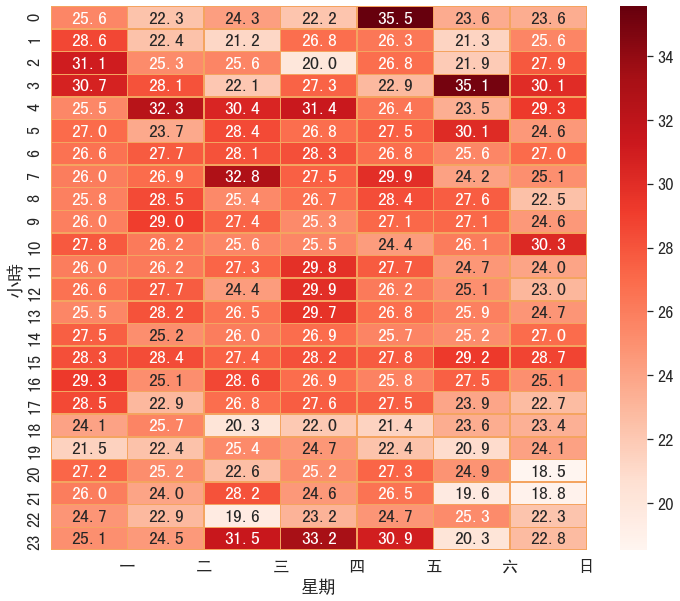

In [674]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wh,annot=True,fmt=".1f",linewidth=0.5,linecolor='sandybrown',cmap="Reds",annot_kws={"size":18})
#plt.title("交通事故--國1南向小型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('小時vs星期 散熱圖.png')

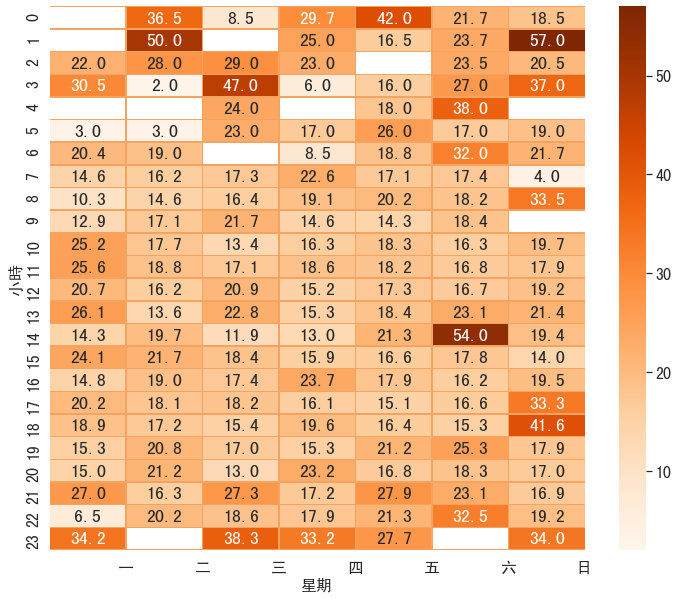

In [606]:
#sns.set_style("white")
plt.figure(figsize=(12,10))
sns.heatmap(df_wh1ss,annot=True,fmt=".1f",linewidth=0.5,linecolor='sandybrown',cmap="Oranges",annot_kws={"size":18})
#plt.title("交通事故--國1南向小型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
#plt.savefig('小時vs星期 南向小車熱圖.png')

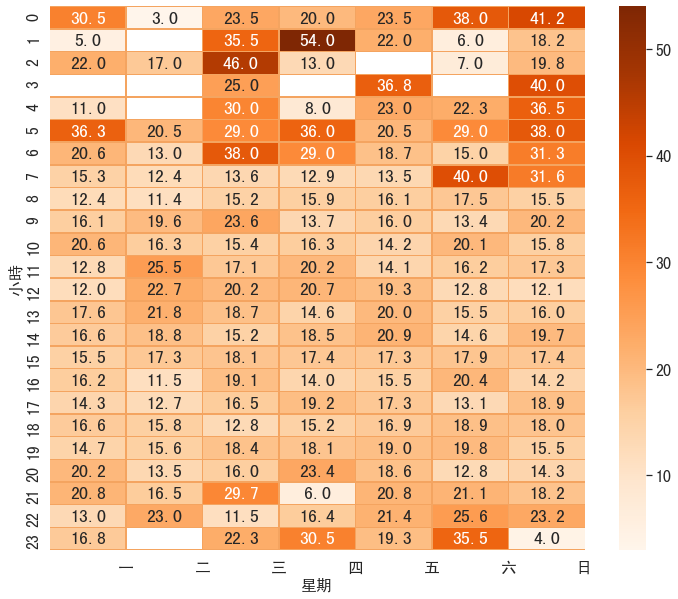

In [607]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wh1sn,annot=True,fmt=".1f",linewidth=0.5,linecolor='sandybrown',cmap="Oranges",annot_kws={"size":18})
#plt.title("交通事故--國1北向小型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('小時vs星期 北向小車熱圖.png')

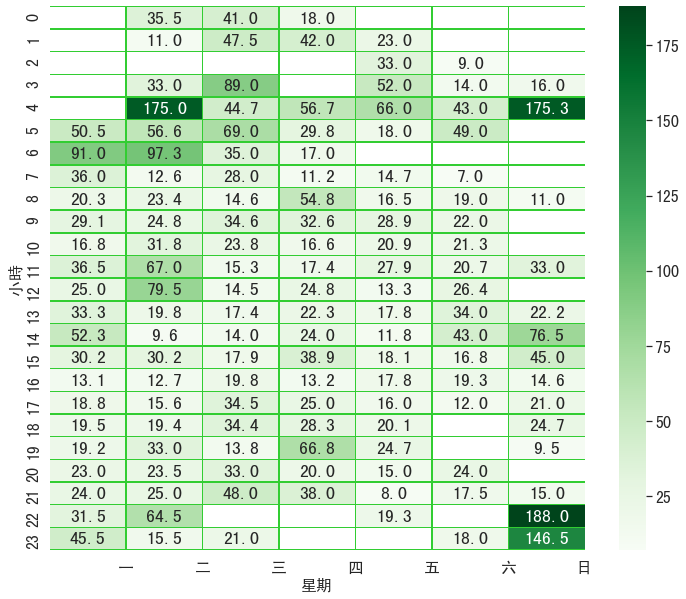

In [615]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wh1b,annot=True,fmt=".1f",linewidth=0.5,linecolor='limegreen',cmap="Greens",annot_kws={"size":18})
#plt.title("交通事故--國1南向大型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('小時vs星期 大車熱圖.png')

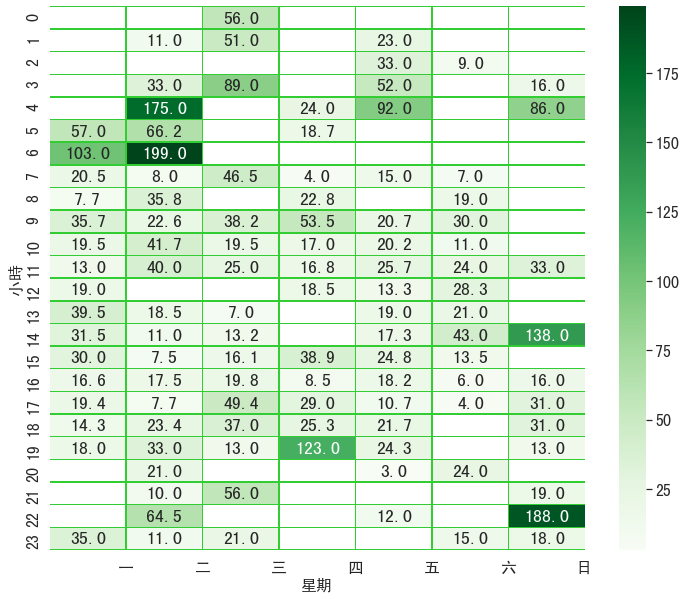

In [608]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wh1bs,annot=True,fmt=".1f",linewidth=0.5,linecolor='limegreen',cmap="Greens",annot_kws={"size":18})
#plt.title("交通事故--國1南向大型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('小時vs星期 南向大車熱圖.png')

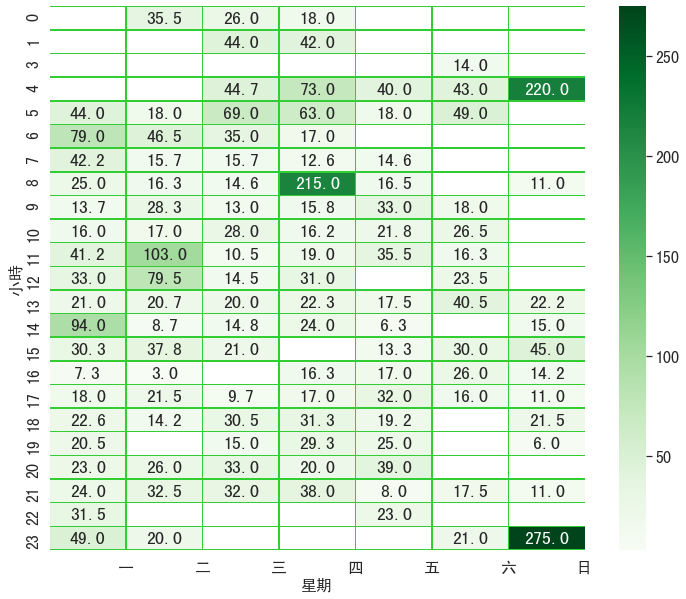

In [610]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wh1bn,annot=True,fmt=".1f",linewidth=0.5,linecolor='limegreen',cmap="Greens",annot_kws={"size":18})
#plt.title("交通事故--國1北向大型車平均處理時間(分鐘)",fontsize=20)
plt.xticks(ticks=range(1,8,1),labels=("一","二","三","四","五","六","日"))
plt.savefig('小時vs星期 北向大車熱圖.png')

In [101]:
data1=data[(data["公路名稱"]=='國1')]
data1s=data1[data1["大小車"]=="s"]
data1b=data1[data1["大小車"]=="b"]


data3=data[data["公路名稱"]=="國3"]
data3s=data3[data3["大小車"]=="s"]
data3b=data3[data3["大小車"]=="b"]


In [617]:
min_list=[]
for i in data1s["處理時間"]:
    if i<=20:
        mi="20分鐘內"
    elif 20<i<=40:
        mi="21~40分鐘"
    elif 40<i<=60:
        mi="41~60分鐘"
    else:
        mi="超過60分鐘"
    min_list.append(mi)
data1s["分鐘級距"]=min_list

min_list=[]
for i in data1b["處理時間"]:
    if i<=20:
        mi="20分鐘內"
    elif 20<i<=40:
        mi="21~40分鐘"
    elif 40<i<=60:
        mi="41~60分鐘"
    else:
        mi="超過60分鐘"
    min_list.append(mi)
data1b["分鐘級距"]=min_list



In [388]:
data1s["處理時間"]

1        2.0
2       48.0
3       25.0
4       23.0
5        8.0
        ... 
7286    20.0
7287    18.0
7288     8.0
7289    23.0
7290    16.0
Name: 處理時間, Length: 6719, dtype: float64

In [618]:
data1s=data1s.reset_index(drop=True)
data1s["編號"]=data1s.index
data1s["編號"]

df_min=data1s.groupby(by="分鐘級距").size()/data1s.shape[0]
print(df_min)

data1s=data1s[data1s["處理時間"]<140]

gr1=data1s[data1s["分鐘級距"]=="20分鐘內"]
gr2=data1s[data1s["分鐘級距"]=="21~40分鐘"]
gr3=data1s[data1s["分鐘級距"]=="41~60分鐘"]
gr4=data1s[data1s["分鐘級距"]=="超過60分鐘"]


分鐘級距
20分鐘內      0.678524
21~40分鐘    0.265962
41~60分鐘    0.048370
超過60分鐘     0.007144
dtype: float64


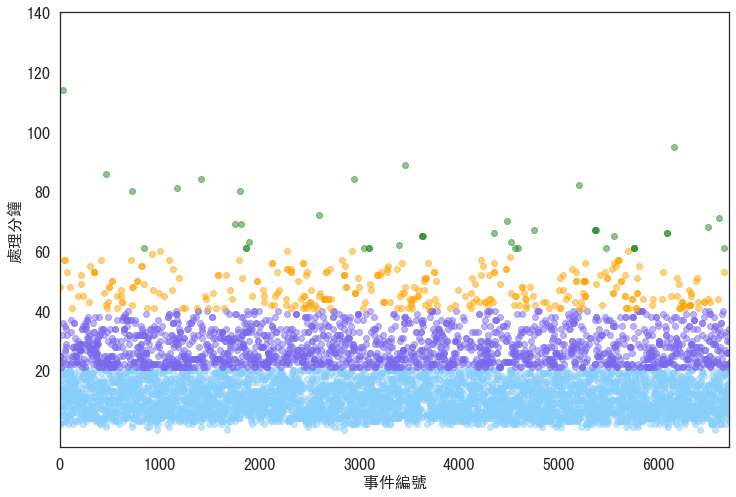

In [622]:
plt.figure(figsize=(12,8))

plt.scatter(x=gr1["編號"],y=gr1["處理時間"],c='lightskyblue',alpha=0.5)
plt.scatter(x=gr2["編號"],y=gr2["處理時間"],c='mediumslateblue',alpha=0.5)
plt.scatter(x=gr3["編號"],y=gr3["處理時間"],c='orange',alpha=0.5)
plt.scatter(x=gr4["編號"],y=gr4["處理時間"],c='forestgreen',alpha=0.5)
plt.xlim(0,data1s.shape[0])
plt.yticks([20,40,60,80,100,120,140])
plt.xlabel("事件編號")
plt.ylabel("處理分鐘")
#plt.title("交通事故--國1小型車處理時間分佈",fontsize=18)
#plt.edgecolor('gray')
plt.savefig('小型車處理時間比例.png')

In [623]:
data1b=data1b.reset_index(drop=True)
data1b["編號"]=data1b.index
data1b["編號"]

df_min=data1b.groupby(by="分鐘級距").size()/data1b.shape[0]
print(df_min)

data1b=data1b[data1b["處理時間"]<140]

gr1=data1b[data1b["分鐘級距"]=="20分鐘內"]
gr2=data1b[data1b["分鐘級距"]=="21~40分鐘"]
gr3=data1b[data1b["分鐘級距"]=="41~60分鐘"]
gr4=data1b[data1b["分鐘級距"]=="超過60分鐘"]

分鐘級距
20分鐘內      0.529720
21~40分鐘    0.291958
41~60分鐘    0.099650
超過60分鐘     0.078671
dtype: float64


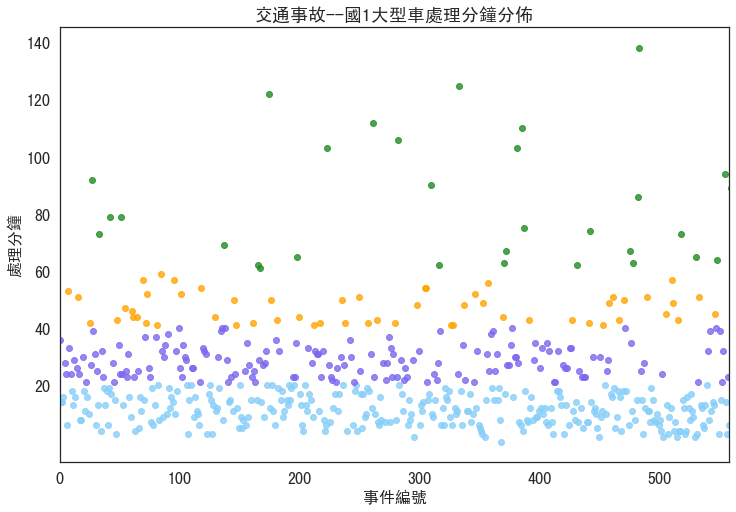

In [624]:
plt.figure(figsize=(12,8))

plt.scatter(x=gr1["編號"],y=gr1["處理時間"],c='lightskyblue',alpha=0.8)
plt.scatter(x=gr2["編號"],y=gr2["處理時間"],c='mediumslateblue',alpha=0.8)
plt.scatter(x=gr3["編號"],y=gr3["處理時間"],c='orange',alpha=0.8)
plt.scatter(x=gr4["編號"],y=gr4["處理時間"],c='forestgreen',alpha=0.8)
plt.xlim(0,data1b.shape[0])
plt.yticks([20,40,60,80,100,120,140])
plt.xlabel("事件編號")
plt.ylabel("處理分鐘")
plt.title("交通事故--國1大型車處理分鐘分佈",fontsize=18)
plt.savefig('大型車處理時間比例.png')

data3s=data3s.reset_index(drop=True)
data3s["編號"]=data3s.index
data3s["編號"]

df_min=data3s.groupby(by="分鐘級距").size()/data3s.shape[0]
print(df_min)

data3s=data3s[data3s["處理時間"]<140]

gr1=data3s[data3s["分鐘級距"]=="20分鐘內"]
gr2=data3s[data3s["分鐘級距"]=="21~40分鐘"]
gr3=data3s[data3s["分鐘級距"]=="41~60分鐘"]
gr4=data3s[data3s["分鐘級距"]=="超過60分鐘"]

plt.figure(figsize=(10,8))

plt.scatter(x=gr1["編號"],y=gr1["處理時間"],c='salmon',alpha=0.5)
plt.scatter(x=gr2["編號"],y=gr2["處理時間"],c='gold',alpha=0.5)
plt.scatter(x=gr3["編號"],y=gr3["處理時間"],c='peru',alpha=0.5)
plt.scatter(x=gr4["編號"],y=gr4["處理時間"],c='darkgreen',alpha=0.5)
plt.xlim(0,data3s.shape[0])
plt.yticks([20,40,60,80,100,120,140])
plt.xlabel("事件編號")
plt.ylabel("處理分鐘")
plt.title("國3小型車事件處理分鐘分佈",fontsize=18)

data3b=data3b.reset_index(drop=True)
data3b["編號"]=data3b.index
data3b["編號"]

df_min=data3b.groupby(by="分鐘級距").size()/data3b.shape[0]
print(df_min)

data3b=data3b[data3b["處理時間"]<140]

gr1=data3b[data3b["分鐘級距"]=="20分鐘內"]
gr2=data3b[data3b["分鐘級距"]=="21~40分鐘"]
gr3=data3b[data3b["分鐘級距"]=="41~60分鐘"]
gr4=data3b[data3b["分鐘級距"]=="超過60分鐘"]

plt.figure(figsize=(10,8))

plt.scatter(x=gr1["編號"],y=gr1["處理時間"],c='salmon',alpha=0.8)
plt.scatter(x=gr2["編號"],y=gr2["處理時間"],c='gold',alpha=0.8)
plt.scatter(x=gr3["編號"],y=gr3["處理時間"],c='peru',alpha=0.8)
plt.scatter(x=gr4["編號"],y=gr4["處理時間"],c='darkgreen',alpha=0.8)
plt.xlim(0,data3b.shape[0])
plt.yticks([20,40,60,80,100,120,140])
plt.xlabel("事件編號")
plt.ylabel("處理分鐘")
plt.title("國3大型車事件處理分鐘分佈",fontsize=18)

## 散落物

In [3]:
os.chdir("d:\M05A")

In [4]:
df=pd.read_csv("obj_all_clean(dum).csv",index_col=0)

In [5]:
df.columns

Index(['Unnamed: 0.1', '通報日期', '國道名稱', '方向', '里程數', '占用車道', '通報時間', '事件排除',
       '處理分鐘', '散落物類別', '通報來源', '時+日', '道路+方向', '總通行量', '總平均車速', '月', '小時',
       '星期', '迴轉道', '內路肩', '外路肩', '外側車道', '中線車道', '全車道', '內側車道', '第一車道',
       '第二車道', '第三車道', '第四車道', '第五車道', '匝道', '隧道', '槽化線', '占用車道數'],
      dtype='object')

In [6]:
per_list=[]

for i in df["小時"]:
    if (22<=i<24) or (0<=i<7):
        per="凌晨"
    elif (7<=i<11) or (17<=i<21):
        per="尖峰"
    else:
        
        per="離峰"
    per_list.append(per)
df["時段"]=per_list






In [7]:
df["散落物類別"].unique()

array([ 3,  6, 20, 21, 12, 15,  9,  5,  4,  2, 13, 16, 22,  7,  1, 19, 14,
       11,  8, 10, 23, 17,  0, 18], dtype=int64)

In [8]:
ob_list=[]
for i in df["散落物類別"]:
    if i ==0:
        ob="事故"
    elif 1<=i<14:
        ob="承載物品"
    elif 14<=i<20:
        ob="車體零件"
    elif 20<=i<22:
        ob="動物屍體"
    elif 22==i:
        ob="施工養護"
    else:
        ob="其他"
    ob_list.append(ob)
df["散落物主類型"]=ob_list
        
        

In [9]:
df["散落物類別"]=[str(i).replace("10","砂石類") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("11","垃圾") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("12","棧板") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("13","其他") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("14","輪胎") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("15","胎皮") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("16","保險桿") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("17","排氣管") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("18","油漬") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("19","其他") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("21","動物屍") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("22","施工養護物件") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("23","其他") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("0","事故") for i in df["散落物類別"]]


df["散落物類別"]=[str(i).replace("1","布製品") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("2","紙製品") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("3","木塊、棍") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("4","其他木製類") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("5","塑膠箱") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("6","其他塑膠製品") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("7","鐵條、鐵管") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("8","鐵塊") for i in df["散落物類別"]]
df["散落物類別"]=[str(i).replace("9","其他金屬製品") for i in df["散落物類別"]]


In [10]:
df["散落物類別"]

0          木塊、棍
1        其他塑膠製品
2         紙製品事故
3        其他塑膠製品
4           動物屍
          ...  
21488     紙製品事故
21489     紙製品事故
21490       塑膠箱
21491        其他
21492        其他
Name: 散落物類別, Length: 18908, dtype: object

In [11]:
min_list=[]
for i in df["處理分鐘"]:
    if i<=20:
        mi="20分鐘內"
    elif 20<i<=40:
        mi="21~40分鐘"
    elif 40<i<=60:
        mi="41~60分鐘"
    else:
        mi="超過60分鐘"
    min_list.append(mi)
df["分鐘級距"]=min_list



In [12]:
df1=df.reset_index(drop=True)
df1["編號"]=df1.index


df_min=df1.groupby(by="分鐘級距").size()/df1.shape[0]
print(df_min)

df1=df1[df1["處理分鐘"]<180]

gr1=df1[df1["分鐘級距"]=="20分鐘內"]
gr2=df1[df1["分鐘級距"]=="21~40分鐘"]
gr3=df1[df1["分鐘級距"]=="41~60分鐘"]
gr4=df1[df1["分鐘級距"]=="超過60分鐘"]


分鐘級距
20分鐘內      0.436006
21~40分鐘    0.403639
41~60分鐘    0.105881
超過60分鐘     0.054474
dtype: float64


In [13]:
df1["處理分鐘"].mean()

26.470039240640578

In [14]:
sns.set_style("white")
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')

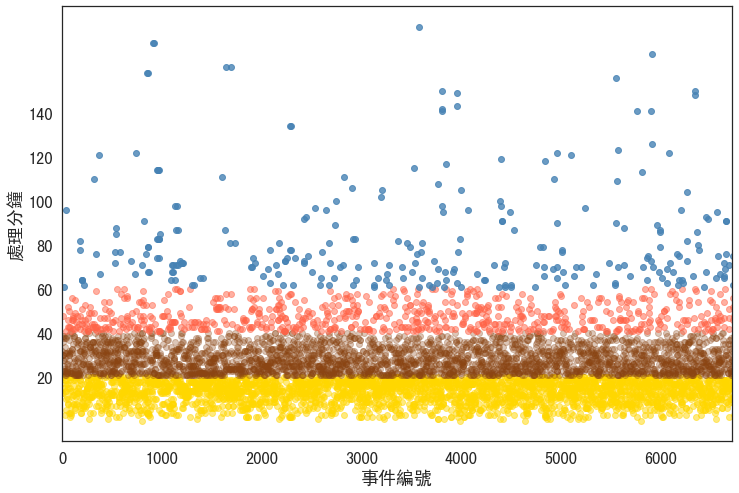

In [638]:
plt.figure(figsize=(12,8))

plt.scatter(x=gr1["編號"],y=gr1["處理分鐘"],c='gold',alpha=0.5)
plt.scatter(x=gr2["編號"],y=gr2["處理分鐘"],c='saddlebrown',alpha=0.3)
plt.scatter(x=gr3["編號"],y=gr3["處理分鐘"],c='tomato',alpha=0.5)
plt.scatter(x=gr4["編號"],y=gr4["處理分鐘"],c='steelblue',alpha=0.8)
plt.xlim(0,data1s.shape[0])
plt.yticks([20,40,60,80,100,120,140])
plt.xlabel("事件編號")
plt.ylabel("處理分鐘")
#plt.title("交通事故--國1散落物處理時間分佈",fontsize=18)
#plt.edgecolor('gray')
plt.savefig('散落處理時間比例.png')

In [639]:

sns.set()
sns.set(font_scale=2)
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')

(0, 180)

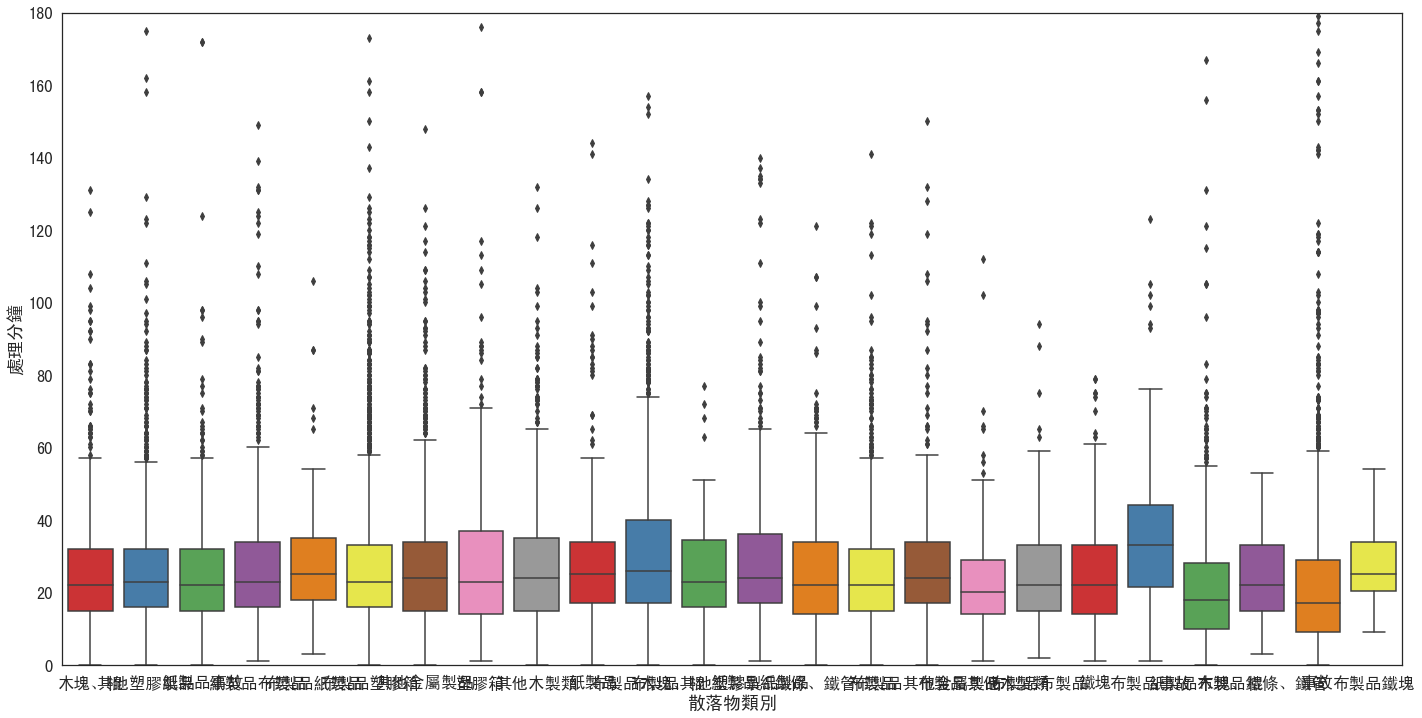

In [740]:
plt.figure(figsize=(24,12))
sns.boxplot(x="散落物類別",y="處理分鐘",data=df1,palette="Set1")

plt.ylim(0,180)
#plt.title("散落物事故--散落物類型與處理時間盒狀圖",fontsize=28)
#plt.savefig('散落物事故--散落物類型與處理時間盒狀圖.png')

In [682]:
sns.set()
sns.set(font_scale=1.5)
sns.set_palette("Set2")
sns.set_style({"font.sans-serif":["SimHei"]})
#sns.set_context('talk')

In [ ]:
sns.relplot(x="total_bill", y="tip", col="sex", data=tips)

In [ ]:
seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
scatter_kws=None, line_kws=None

<Figure size 1728x864 with 0 Axes>

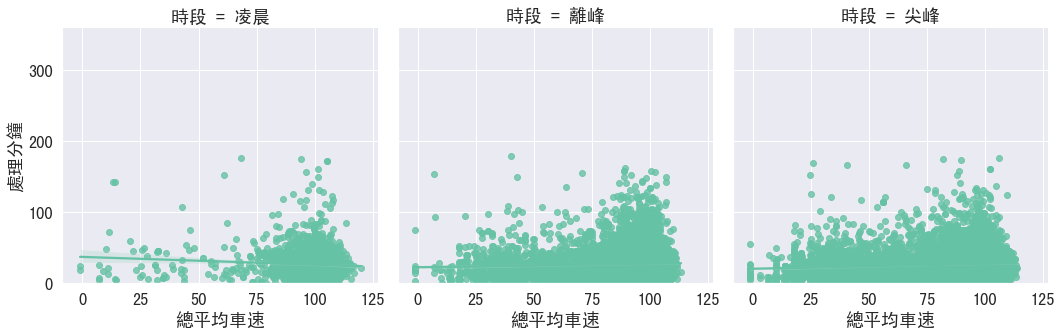

In [647]:
plt.figure(figsize=(24,12))
sns.lmplot(x="總平均車速", y='處理分鐘',col="時段",data=df1,col_order=["凌晨","離峰","尖峰"])
plt.ylim(0,360)
#plt.xlim(0,8)
#plt.title("總平均車速與平均處理時間 線性回歸關係圖")
plt.savefig('總平均車速與處理時間(散) 線性回歸關係圖.png')

<Figure size 1728x864 with 0 Axes>

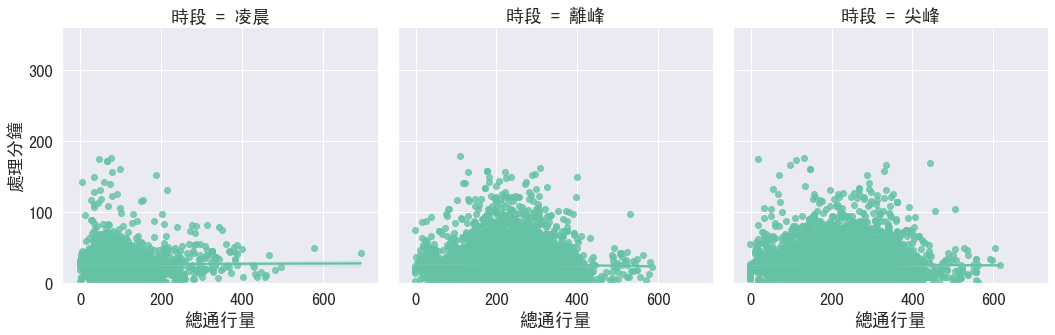

In [653]:
plt.figure(figsize=(24,12))
sns.lmplot(x="總通行量", y='處理分鐘',col="時段",data=df1,col_order=["凌晨","離峰","尖峰"])
plt.ylim(0,360)
#plt.xlim(0,500)

#plt.title("受傷人數與平均處理時間 線性回歸關係圖")
plt.savefig('總通行量與平均處理時間(散) 線性回歸關係圖.png')

<Figure size 1728x1008 with 0 Axes>

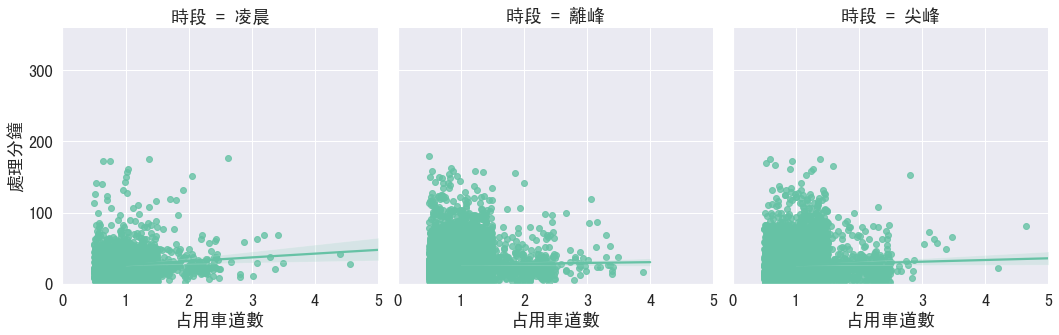

In [685]:
plt.figure(figsize=(24,14))
sns.lmplot(x="占用車道數", y='處理分鐘',col="時段",data=df1,x_jitter=0.5,col_order=["凌晨","離峰","尖峰"])
plt.ylim(0,360)
plt.xlim(0,5)
plt.savefig('占用車道數與平均處理時間(散) 線性回歸關係圖.png')

In [730]:
d1=df[df["時段"]=="離峰"]


In [20]:
d=df.groupby(by=["散落物類別"])["處理分鐘"].mean()
d.reset_index()

d.to_csv("ddd.csv",encoding="utf_8_sig")

In [21]:
d

散落物類別
事故        24.595706
保險桿       25.550847
其他        30.611266
其他塑膠製品    27.649135
其他木製類     27.615877
其他金屬製品    27.147321
動物屍       28.394958
垃圾        25.206250
塑膠箱       30.077670
布製品       25.642913
排氣管       23.457143
施工養護物件    30.495455
木塊、棍      26.053712
棧板        27.769784
油漬        28.500000
砂石類       37.277108
紙製品       27.829574
紙製品事故     25.507513
胎皮        27.450307
輪胎        23.261905
鐵塊        25.754491
鐵條、鐵管     26.088803
Name: 處理分鐘, dtype: float64